In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_10degree.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape(((36*3+1)*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(10deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape(((36*3+1)*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.3,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(457, 100, 100)


In [17]:
print(y_test.shape)

(197, 100, 100)


In [18]:
print(x_train.shape)

(457, 15, 1)


In [19]:
print(x_test.shape)

(197, 15, 1)


In [20]:
theta_train.shape

(457,)

In [21]:
tsr_train.shape

(457,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [24]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((457, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((197, 2, 1))

In [28]:
tsr_theta_train.shape

(457, 2, 1)

In [29]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
12/12 [==============================] - 1s 4ms/step - loss: 0.0215 - rmse: 0.1467
Epoch 2/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 3/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 4/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 5/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 6/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 7/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0184 - rmse: 0.1357
Epoch 8/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0184 - rmse: 0.1356
Epoch 9/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0184 - rmse: 0.1357
Epoch 10/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 11/10000
12/12 [=======

12/12 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1306
Epoch 85/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1306
Epoch 86/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1304
Epoch 87/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1303
Epoch 88/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1303
Epoch 89/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0170 - rmse: 0.1303
Epoch 90/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 91/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 92/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1305
Epoch 93/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1307
Epoch 94/10000
12/12 [=============

12/12 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1263
Epoch 168/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 169/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1267
Epoch 170/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1259
Epoch 171/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 172/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1258
Epoch 173/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1260
Epoch 174/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 175/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1260
Epoch 176/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1263
Epoch 177/10000
12/12 [===

12/12 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1232
Epoch 250/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1225
Epoch 251/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1223
Epoch 252/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1222
Epoch 253/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1221
Epoch 254/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1222
Epoch 255/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1216
Epoch 256/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1216
Epoch 257/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1217
Epoch 258/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1215
Epoch 259/10000
12/12 [===

12/12 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.1176
Epoch 332/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1170
Epoch 333/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1164
Epoch 334/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1170
Epoch 335/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1166
Epoch 336/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1165
Epoch 337/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1167
Epoch 338/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1171
Epoch 339/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1169
Epoch 340/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.1176
Epoch 341/10000
12/12 [===

12/12 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1079
Epoch 414/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1077
Epoch 415/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.1073
Epoch 416/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.1073
Epoch 417/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0114 - rmse: 0.1066
Epoch 418/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0114 - rmse: 0.1067
Epoch 419/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1063
Epoch 420/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1057
Epoch 421/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1062
Epoch 422/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1076
Epoch 423/10000
12/12 [===

12/12 [==============================] - 0s 3ms/step - loss: 0.0094 - rmse: 0.0967
Epoch 496/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0966
Epoch 497/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0967
Epoch 498/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0963
Epoch 499/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0969
Epoch 500/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0963
Epoch 501/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0958
Epoch 502/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0091 - rmse: 0.0953
Epoch 503/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0957
Epoch 504/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0092 - rmse: 0.0958
Epoch 505/10000
12/12 [===

12/12 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0874
Epoch 578/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0878
Epoch 579/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0079 - rmse: 0.0887
Epoch 580/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0874
Epoch 581/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0876
Epoch 582/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0076 - rmse: 0.0873
Epoch 583/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0872
Epoch 584/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0878
Epoch 585/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0875
Epoch 586/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 587/10000
12/12 [===

12/12 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0814
Epoch 660/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0824
Epoch 661/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 662/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0813
Epoch 663/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0810
Epoch 664/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0065 - rmse: 0.0805
Epoch 665/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0066 - rmse: 0.0810
Epoch 666/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0810
Epoch 667/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0808
Epoch 668/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0809
Epoch 669/10000
12/12 [===

12/12 [==============================] - 0s 6ms/step - loss: 0.0058 - rmse: 0.0765
Epoch 742/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0760
Epoch 743/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 744/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0057 - rmse: 0.0754
Epoch 745/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 746/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0753
Epoch 747/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0759
Epoch 748/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 749/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0754
Epoch 750/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0745
Epoch 751/10000
12/12 [===

12/12 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0703
Epoch 824/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0713
Epoch 825/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0051 - rmse: 0.0711
Epoch 826/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0701
Epoch 827/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 828/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0719
Epoch 829/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0712
Epoch 830/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0709
Epoch 831/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0712
Epoch 832/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0051 - rmse: 0.0711
Epoch 833/10000
12/12 [===

12/12 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 906/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 907/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0674
Epoch 908/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0679
Epoch 909/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0667
Epoch 910/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 911/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0657
Epoch 912/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 913/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0663
Epoch 914/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 915/10000
12/12 [===

12/12 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0626
Epoch 988/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 989/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 990/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0626
Epoch 991/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0628
Epoch 992/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 993/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 994/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0636
Epoch 995/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 996/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 997/10000
12/12 [===

12/12 [==============================] - 0s 3ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 1070/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 1071/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 1072/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0587
Epoch 1073/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 1074/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 1075/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0602
Epoch 1076/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 1077/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 1078/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 1079/10000


12/12 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 1152/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 1153/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0559
Epoch 1154/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 1155/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0031 - rmse: 0.0557
Epoch 1156/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 1157/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 1158/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 1159/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 1160/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 1161/10000


12/12 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 1234/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 1235/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 1236/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 1237/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 1238/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 1239/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 1240/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 1241/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 1242/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 1243/10000


12/12 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 1316/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 1317/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 1318/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 1319/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 1320/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 1321/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 1322/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 1323/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0494
Epoch 1324/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 1325/10000


12/12 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 1398/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 1399/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 1400/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0464
Epoch 1401/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 1402/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 1403/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 1404/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 1405/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 1406/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 1407/10000


12/12 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 1480/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 1481/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 1482/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 1483/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 1484/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 1485/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 1486/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 1487/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 1488/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 1489/10000


12/12 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 1561/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 1562/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 1563/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 1564/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 1565/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 1566/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 1567/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 1568/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 1569/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 1570/10000


12/12 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0406
Epoch 1643/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 1644/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 1645/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 1646/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 1647/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0404
Epoch 1648/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0428
Epoch 1649/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 1650/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 1651/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 1652/10000


12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0367
Epoch 1725/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 1726/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 1727/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 1728/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 1729/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 1730/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 1731/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 1732/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 1733/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 1734/10000


12/12 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 1807/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 1808/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 1809/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0359
Epoch 1810/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 1811/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 1812/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 1813/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0354
Epoch 1814/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 1815/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 1816/10000


12/12 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 1889/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 1890/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 1891/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 1892/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 1893/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 1894/10000
12/12 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 1895/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 1896/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 1897/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0320
Epoch 1898/10000


12/12 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 1970/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.5714e-04 - rmse: 0.0309
Epoch 1971/10000
12/12 [==============================] - 0s 3ms/step - loss: 9.4436e-04 - rmse: 0.0307
Epoch 1972/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 1973/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.7363e-04 - rmse: 0.0312
Epoch 1974/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 1975/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 1976/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 1977/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 1978/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0343
Epoch

12/12 [==============================] - 0s 4ms/step - loss: 8.7785e-04 - rmse: 0.0296
Epoch 2050/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.2246e-04 - rmse: 0.0287
Epoch 2051/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.4847e-04 - rmse: 0.0291
Epoch 2052/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.9819e-04 - rmse: 0.0300
Epoch 2053/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.2843e-04 - rmse: 0.0288
Epoch 2054/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.2100e-04 - rmse: 0.0287
Epoch 2055/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.2307e-04 - rmse: 0.0287
Epoch 2056/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.5528e-04 - rmse: 0.0292
Epoch 2057/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.5992e-04 - rmse: 0.0293
Epoch 2058/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.0

12/12 [==============================] - 0s 3ms/step - loss: 8.5767e-04 - rmse: 0.0293
Epoch 2129/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.9377e-04 - rmse: 0.0282
Epoch 2130/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.8993e-04 - rmse: 0.0281
Epoch 2131/10000
12/12 [==============================] - 0s 3ms/step - loss: 8.2356e-04 - rmse: 0.0287
Epoch 2132/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.1256e-04 - rmse: 0.0285
Epoch 2133/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.4979e-04 - rmse: 0.0308
Epoch 2134/10000
12/12 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 2135/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.6900e-04 - rmse: 0.0311
Epoch 2136/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.4057e-04 - rmse: 0.0307
Epoch 2137/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.4759e

12/12 [==============================] - 0s 5ms/step - loss: 8.5844e-04 - rmse: 0.0293
Epoch 2208/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.7429e-04 - rmse: 0.0296
Epoch 2209/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.0917e-04 - rmse: 0.0302
Epoch 2210/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.9280e-04 - rmse: 0.0282
Epoch 2211/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.4140e-04 - rmse: 0.0272
Epoch 2212/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.1041e-04 - rmse: 0.0267
Epoch 2213/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.6537e-04 - rmse: 0.0277
Epoch 2214/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.9670e-04 - rmse: 0.0282
Epoch 2215/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.4097e-04 - rmse: 0.0272
Epoch 2216/10000
12/12 [==============================] - 0s 3ms/step - loss: 7.4

12/12 [==============================] - 0s 4ms/step - loss: 7.7101e-04 - rmse: 0.0278
Epoch 2286/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.4552e-04 - rmse: 0.0273
Epoch 2287/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.8660e-04 - rmse: 0.0280
Epoch 2288/10000
12/12 [==============================] - 0s 3ms/step - loss: 7.4098e-04 - rmse: 0.0272
Epoch 2289/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.6867e-04 - rmse: 0.0277
Epoch 2290/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.3317e-04 - rmse: 0.0289
Epoch 2291/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.5797e-04 - rmse: 0.0275
Epoch 2292/10000
12/12 [==============================] - 0s 3ms/step - loss: 7.5908e-04 - rmse: 0.0276
Epoch 2293/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.8054e-04 - rmse: 0.0279
Epoch 2294/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.3

12/12 [==============================] - 0s 4ms/step - loss: 6.8563e-04 - rmse: 0.0262
Epoch 2364/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.2270e-04 - rmse: 0.0250
Epoch 2365/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.4697e-04 - rmse: 0.0254
Epoch 2366/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.6698e-04 - rmse: 0.0258
Epoch 2367/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.4691e-04 - rmse: 0.0254
Epoch 2368/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.9674e-04 - rmse: 0.0244
Epoch 2369/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.0397e-04 - rmse: 0.0246
Epoch 2370/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.3724e-04 - rmse: 0.0252
Epoch 2371/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.4476e-04 - rmse: 0.0254
Epoch 2372/10000
12/12 [==============================] - 0s 3ms/step - loss: 5.9

12/12 [==============================] - 0s 4ms/step - loss: 5.4475e-04 - rmse: 0.0233
Epoch 2442/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.5782e-04 - rmse: 0.0236
Epoch 2443/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.1053e-04 - rmse: 0.0247
Epoch 2444/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.3909e-04 - rmse: 0.0253
Epoch 2445/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.0057e-04 - rmse: 0.0245
Epoch 2446/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.7708e-04 - rmse: 0.0240
Epoch 2447/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.5689e-04 - rmse: 0.0236
Epoch 2448/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.8959e-04 - rmse: 0.0243
Epoch 2449/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.7218e-04 - rmse: 0.0239
Epoch 2450/10000
12/12 [==============================] - 0s 3ms/step - loss: 6.0

12/12 [==============================] - 0s 4ms/step - loss: 5.4989e-04 - rmse: 0.0234
Epoch 2520/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.0897e-04 - rmse: 0.0226
Epoch 2521/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.5193e-04 - rmse: 0.0235
Epoch 2522/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.6118e-04 - rmse: 0.0237
Epoch 2523/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.4147e-04 - rmse: 0.0233
Epoch 2524/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.4391e-04 - rmse: 0.0233
Epoch 2525/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.0374e-04 - rmse: 0.0224
Epoch 2526/10000
12/12 [==============================] - 0s 3ms/step - loss: 5.1053e-04 - rmse: 0.0226
Epoch 2527/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.0729e-04 - rmse: 0.0225
Epoch 2528/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.4

12/12 [==============================] - 0s 6ms/step - loss: 5.4987e-04 - rmse: 0.0234
Epoch 2598/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8921e-04 - rmse: 0.0221
Epoch 2599/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7482e-04 - rmse: 0.0218
Epoch 2600/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.1653e-04 - rmse: 0.0227
Epoch 2601/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.5625e-04 - rmse: 0.0236
Epoch 2602/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.3058e-04 - rmse: 0.0230
Epoch 2603/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.5869e-04 - rmse: 0.0236
Epoch 2604/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.8020e-04 - rmse: 0.0241
Epoch 2605/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.2345e-04 - rmse: 0.0229
Epoch 2606/10000
12/12 [==============================] - 0s 3ms/step - loss: 5.0

12/12 [==============================] - 0s 4ms/step - loss: 4.3193e-04 - rmse: 0.0208
Epoch 2676/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.3876e-04 - rmse: 0.0209
Epoch 2677/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.3636e-04 - rmse: 0.0209
Epoch 2678/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.4246e-04 - rmse: 0.0210
Epoch 2679/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.3713e-04 - rmse: 0.0209
Epoch 2680/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.4576e-04 - rmse: 0.0211
Epoch 2681/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.7745e-04 - rmse: 0.0219
Epoch 2682/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.2488e-04 - rmse: 0.0229
Epoch 2683/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.0438e-04 - rmse: 0.0225
Epoch 2684/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6

12/12 [==============================] - 0s 4ms/step - loss: 3.9380e-04 - rmse: 0.0198
Epoch 2754/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.1287e-04 - rmse: 0.0203
Epoch 2755/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.7411e-04 - rmse: 0.0218
Epoch 2756/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.6385e-04 - rmse: 0.0215
Epoch 2757/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.4035e-04 - rmse: 0.0210
Epoch 2758/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.2294e-04 - rmse: 0.0206
Epoch 2759/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.0360e-04 - rmse: 0.0201
Epoch 2760/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.3044e-04 - rmse: 0.0207
Epoch 2761/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.9544e-04 - rmse: 0.0223
Epoch 2762/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.5

12/12 [==============================] - 0s 4ms/step - loss: 4.5786e-04 - rmse: 0.0214
Epoch 2832/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.7918e-04 - rmse: 0.0219
Epoch 2833/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.6939e-04 - rmse: 0.0217
Epoch 2834/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.1919e-04 - rmse: 0.0205
Epoch 2835/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.9800e-04 - rmse: 0.0199
Epoch 2836/10000
12/12 [==============================] - 0s 3ms/step - loss: 4.1082e-04 - rmse: 0.0203
Epoch 2837/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.4109e-04 - rmse: 0.0210
Epoch 2838/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.2666e-04 - rmse: 0.0207
Epoch 2839/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.9963e-04 - rmse: 0.0200
Epoch 2840/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.1

12/12 [==============================] - 0s 4ms/step - loss: 4.1014e-04 - rmse: 0.0203
Epoch 2910/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.8356e-04 - rmse: 0.0196
Epoch 2911/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.7677e-04 - rmse: 0.0194
Epoch 2912/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.0685e-04 - rmse: 0.0202
Epoch 2913/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.1047e-04 - rmse: 0.0203
Epoch 2914/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.8179e-04 - rmse: 0.0195
Epoch 2915/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.1142e-04 - rmse: 0.0203
Epoch 2916/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.0359e-04 - rmse: 0.0201
Epoch 2917/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.9967e-04 - rmse: 0.0200
Epoch 2918/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.6

12/12 [==============================] - 0s 3ms/step - loss: 3.7144e-04 - rmse: 0.0193
Epoch 2988/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.4750e-04 - rmse: 0.0212
Epoch 2989/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.7865e-04 - rmse: 0.0195
Epoch 2990/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.5550e-04 - rmse: 0.0189
Epoch 2991/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.7317e-04 - rmse: 0.0193
Epoch 2992/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.8185e-04 - rmse: 0.0195
Epoch 2993/10000
12/12 [==============================] - 0s 3ms/step - loss: 3.9547e-04 - rmse: 0.0199
Epoch 2994/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.6653e-04 - rmse: 0.0191
Epoch 2995/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.5965e-04 - rmse: 0.0190
Epoch 2996/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.7

12/12 [==============================] - 0s 4ms/step - loss: 3.7832e-04 - rmse: 0.0195
Epoch 3066/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.6958e-04 - rmse: 0.0192
Epoch 3067/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.6396e-04 - rmse: 0.0191
Epoch 3068/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.7369e-04 - rmse: 0.0193
Epoch 3069/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.4180e-04 - rmse: 0.0185
Epoch 3070/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.6593e-04 - rmse: 0.0191
Epoch 3071/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.5602e-04 - rmse: 0.0189
Epoch 3072/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.4594e-04 - rmse: 0.0186
Epoch 3073/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.7694e-04 - rmse: 0.0194
Epoch 3074/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.3

12/12 [==============================] - 0s 4ms/step - loss: 3.1964e-04 - rmse: 0.0179
Epoch 3144/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.4926e-04 - rmse: 0.0187
Epoch 3145/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.3737e-04 - rmse: 0.0184
Epoch 3146/10000
12/12 [==============================] - 0s 3ms/step - loss: 3.4475e-04 - rmse: 0.0186
Epoch 3147/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.2674e-04 - rmse: 0.0181
Epoch 3148/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.2393e-04 - rmse: 0.0180
Epoch 3149/10000
12/12 [==============================] - 0s 3ms/step - loss: 3.5201e-04 - rmse: 0.0188
Epoch 3150/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.2448e-04 - rmse: 0.0180
Epoch 3151/10000
12/12 [==============================] - 0s 3ms/step - loss: 3.0503e-04 - rmse: 0.0175
Epoch 3152/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.3

12/12 [==============================] - 0s 4ms/step - loss: 3.4962e-04 - rmse: 0.0187
Epoch 3222/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.2459e-04 - rmse: 0.0180
Epoch 3223/10000
12/12 [==============================] - 0s 3ms/step - loss: 2.8928e-04 - rmse: 0.0170
Epoch 3224/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.7505e-04 - rmse: 0.0166
Epoch 3225/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.6643e-04 - rmse: 0.0163
Epoch 3226/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.6253e-04 - rmse: 0.0162
Epoch 3227/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.6319e-04 - rmse: 0.0162
Epoch 3228/10000
12/12 [==============================] - 0s 3ms/step - loss: 2.7071e-04 - rmse: 0.0165
Epoch 3229/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.1037e-04 - rmse: 0.0176
Epoch 3230/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.1

12/12 [==============================] - 0s 4ms/step - loss: 4.1699e-04 - rmse: 0.0204
Epoch 3300/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.0560e-04 - rmse: 0.0201
Epoch 3301/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.6134e-04 - rmse: 0.0215
Epoch 3302/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.3329e-04 - rmse: 0.0208
Epoch 3303/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.6128e-04 - rmse: 0.0190
Epoch 3304/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.7547e-04 - rmse: 0.0194
Epoch 3305/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.8234e-04 - rmse: 0.0196
Epoch 3306/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.5948e-04 - rmse: 0.0190
Epoch 3307/10000
12/12 [==============================] - 0s 3ms/step - loss: 3.2465e-04 - rmse: 0.0180
Epoch 3308/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.9

12/12 [==============================] - 0s 4ms/step - loss: 3.2271e-04 - rmse: 0.0180
Epoch 3378/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.4439e-04 - rmse: 0.0156
Epoch 3379/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.2380e-04 - rmse: 0.0150
Epoch 3380/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.5287e-04 - rmse: 0.0159
Epoch 3381/10000
12/12 [==============================] - 0s 3ms/step - loss: 2.9061e-04 - rmse: 0.0170
Epoch 3382/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.7040e-04 - rmse: 0.0164
Epoch 3383/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.9984e-04 - rmse: 0.0173
Epoch 3384/10000
12/12 [==============================] - 0s 3ms/step - loss: 3.4109e-04 - rmse: 0.0185
Epoch 3385/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.6483e-04 - rmse: 0.0191
Epoch 3386/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.8

12/12 [==============================] - 0s 3ms/step - loss: 3.0467e-04 - rmse: 0.0175
Epoch 3456/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.9770e-04 - rmse: 0.0173
Epoch 3457/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.5590e-04 - rmse: 0.0160
Epoch 3458/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4051e-04 - rmse: 0.0155
Epoch 3459/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.3816e-04 - rmse: 0.0154
Epoch 3460/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.3440e-04 - rmse: 0.0153
Epoch 3461/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.2622e-04 - rmse: 0.0150
Epoch 3462/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.2822e-04 - rmse: 0.0151
Epoch 3463/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.8443e-04 - rmse: 0.0169
Epoch 3464/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.4

12/12 [==============================] - 0s 4ms/step - loss: 2.8581e-04 - rmse: 0.0169
Epoch 3534/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.0047e-04 - rmse: 0.0173
Epoch 3535/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.6414e-04 - rmse: 0.0163
Epoch 3536/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.4193e-04 - rmse: 0.0156
Epoch 3537/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.4977e-04 - rmse: 0.0158
Epoch 3538/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.4937e-04 - rmse: 0.0158
Epoch 3539/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.2355e-04 - rmse: 0.0150
Epoch 3540/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.2142e-04 - rmse: 0.0149
Epoch 3541/10000
12/12 [==============================] - 0s 3ms/step - loss: 2.1202e-04 - rmse: 0.0146
Epoch 3542/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0

12/12 [==============================] - 0s 4ms/step - loss: 2.7483e-04 - rmse: 0.0166
Epoch 3612/10000
12/12 [==============================] - 0s 3ms/step - loss: 2.6005e-04 - rmse: 0.0161
Epoch 3613/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.6814e-04 - rmse: 0.0164
Epoch 3614/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.3314e-04 - rmse: 0.0183
Epoch 3615/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.9498e-04 - rmse: 0.0172
Epoch 3616/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.8483e-04 - rmse: 0.0169
Epoch 3617/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.4337e-04 - rmse: 0.0156
Epoch 3618/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.5522e-04 - rmse: 0.0160
Epoch 3619/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.0324e-04 - rmse: 0.0174
Epoch 3620/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.1

12/12 [==============================] - 0s 4ms/step - loss: 2.2025e-04 - rmse: 0.0148
Epoch 3690/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.1749e-04 - rmse: 0.0147
Epoch 3691/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.3587e-04 - rmse: 0.0154
Epoch 3692/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.6293e-04 - rmse: 0.0162
Epoch 3693/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.0283e-04 - rmse: 0.0174
Epoch 3694/10000
12/12 [==============================] - 0s 3ms/step - loss: 3.8129e-04 - rmse: 0.0195
Epoch 3695/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.9031e-04 - rmse: 0.0170
Epoch 3696/10000
12/12 [==============================] - 0s 3ms/step - loss: 3.0002e-04 - rmse: 0.0173
Epoch 3697/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.7443e-04 - rmse: 0.0166
Epoch 3698/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.6

12/12 [==============================] - 0s 4ms/step - loss: 2.0139e-04 - rmse: 0.0142
Epoch 3768/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.9101e-04 - rmse: 0.0138
Epoch 3769/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.3276e-04 - rmse: 0.0153
Epoch 3770/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.6632e-04 - rmse: 0.0163
Epoch 3771/10000
12/12 [==============================] - 0s 3ms/step - loss: 2.7625e-04 - rmse: 0.0166
Epoch 3772/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.5393e-04 - rmse: 0.0159
Epoch 3773/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.3035e-04 - rmse: 0.0152
Epoch 3774/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.8162e-04 - rmse: 0.0168
Epoch 3775/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.8815e-04 - rmse: 0.0170
Epoch 3776/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.5

12/12 [==============================] - 0s 5ms/step - loss: 1.8730e-04 - rmse: 0.0137
Epoch 3846/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.8329e-04 - rmse: 0.0135
Epoch 3847/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.8075e-04 - rmse: 0.0134
Epoch 3848/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5914e-04 - rmse: 0.0126
Epoch 3849/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5955e-04 - rmse: 0.0126
Epoch 3850/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.8053e-04 - rmse: 0.0134
Epoch 3851/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7331e-04 - rmse: 0.0132
Epoch 3852/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.3955e-04 - rmse: 0.0155
Epoch 3853/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.7511e-04 - rmse: 0.0166
Epoch 3854/10000
12/12 [==============================] - 0s 3ms/step - loss: 2.9

12/12 [==============================] - 0s 4ms/step - loss: 1.6461e-04 - rmse: 0.0128
Epoch 3924/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6646e-04 - rmse: 0.0129
Epoch 3925/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.8055e-04 - rmse: 0.0134
Epoch 3926/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.9517e-04 - rmse: 0.0140
Epoch 3927/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.8736e-04 - rmse: 0.0137
Epoch 3928/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.7227e-04 - rmse: 0.0131
Epoch 3929/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7413e-04 - rmse: 0.0132
Epoch 3930/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1982e-04 - rmse: 0.0148
Epoch 3931/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1508e-04 - rmse: 0.0147
Epoch 3932/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.1

12/12 [==============================] - 0s 4ms/step - loss: 1.9413e-04 - rmse: 0.0139
Epoch 4002/10000
12/12 [==============================] - 0s 3ms/step - loss: 2.2689e-04 - rmse: 0.0151
Epoch 4003/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.0338e-04 - rmse: 0.0143
Epoch 4004/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.8951e-04 - rmse: 0.0138
Epoch 4005/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.8993e-04 - rmse: 0.0138
Epoch 4006/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6926e-04 - rmse: 0.0130
Epoch 4007/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.7616e-04 - rmse: 0.0133
Epoch 4008/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6121e-04 - rmse: 0.0127
Epoch 4009/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6377e-04 - rmse: 0.0128
Epoch 4010/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6

12/12 [==============================] - 0s 3ms/step - loss: 2.1950e-04 - rmse: 0.0148
Epoch 4080/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.9631e-04 - rmse: 0.0140
Epoch 4081/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.9790e-04 - rmse: 0.0141
Epoch 4082/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.0664e-04 - rmse: 0.0144
Epoch 4083/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.1516e-04 - rmse: 0.0147
Epoch 4084/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.2419e-04 - rmse: 0.0150
Epoch 4085/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.3869e-04 - rmse: 0.0154
Epoch 4086/10000
12/12 [==============================] - 0s 3ms/step - loss: 2.7369e-04 - rmse: 0.0165
Epoch 4087/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.2915e-04 - rmse: 0.0151
Epoch 4088/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.5

12/12 [==============================] - 0s 4ms/step - loss: 2.9903e-04 - rmse: 0.0173
Epoch 4158/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.5852e-04 - rmse: 0.0161
Epoch 4159/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.3981e-04 - rmse: 0.0155
Epoch 4160/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.1027e-04 - rmse: 0.0145
Epoch 4161/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.4069e-04 - rmse: 0.0155
Epoch 4162/10000
12/12 [==============================] - 0s 3ms/step - loss: 2.0025e-04 - rmse: 0.0142
Epoch 4163/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.9723e-04 - rmse: 0.0140
Epoch 4164/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.7730e-04 - rmse: 0.0133
Epoch 4165/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6408e-04 - rmse: 0.0128
Epoch 4166/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6

12/12 [==============================] - 0s 4ms/step - loss: 1.7577e-04 - rmse: 0.0133
Epoch 4236/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.9248e-04 - rmse: 0.0139
Epoch 4237/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.0141e-04 - rmse: 0.0142
Epoch 4238/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.1429e-04 - rmse: 0.0146
Epoch 4239/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.0160e-04 - rmse: 0.0142
Epoch 4240/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.0435e-04 - rmse: 0.0143
Epoch 4241/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.9129e-04 - rmse: 0.0138
Epoch 4242/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.2176e-04 - rmse: 0.0149
Epoch 4243/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.0183e-04 - rmse: 0.0142
Epoch 4244/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.1

12/12 [==============================] - 0s 4ms/step - loss: 1.8609e-04 - rmse: 0.0136
Epoch 4314/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.7808e-04 - rmse: 0.0133
Epoch 4315/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.8911e-04 - rmse: 0.0138
Epoch 4316/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5992e-04 - rmse: 0.0126
Epoch 4317/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.4439e-04 - rmse: 0.0120
Epoch 4318/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4723e-04 - rmse: 0.0121
Epoch 4319/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6019e-04 - rmse: 0.0127
Epoch 4320/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.5522e-04 - rmse: 0.0125
Epoch 4321/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.4990e-04 - rmse: 0.0122
Epoch 4322/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.7

12/12 [==============================] - 0s 4ms/step - loss: 1.7010e-04 - rmse: 0.0130
Epoch 4392/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6705e-04 - rmse: 0.0129
Epoch 4393/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.4307e-04 - rmse: 0.0120
Epoch 4394/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3365e-04 - rmse: 0.0116
Epoch 4395/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3390e-04 - rmse: 0.0116
Epoch 4396/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6646e-04 - rmse: 0.0129
Epoch 4397/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5830e-04 - rmse: 0.0126
Epoch 4398/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5520e-04 - rmse: 0.0125
Epoch 4399/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.3699e-04 - rmse: 0.0117
Epoch 4400/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3

12/12 [==============================] - 0s 4ms/step - loss: 1.6022e-04 - rmse: 0.0127
Epoch 4470/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5615e-04 - rmse: 0.0125
Epoch 4471/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3704e-04 - rmse: 0.0117
Epoch 4472/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.4209e-04 - rmse: 0.0119
Epoch 4473/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5787e-04 - rmse: 0.0126
Epoch 4474/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.3266e-04 - rmse: 0.0115
Epoch 4475/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.4443e-04 - rmse: 0.0120
Epoch 4476/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.4604e-04 - rmse: 0.0121
Epoch 4477/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3764e-04 - rmse: 0.0117
Epoch 4478/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3

12/12 [==============================] - 0s 4ms/step - loss: 1.7617e-04 - rmse: 0.0133
Epoch 4548/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.8986e-04 - rmse: 0.0138
Epoch 4549/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6788e-04 - rmse: 0.0130
Epoch 4550/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.7394e-04 - rmse: 0.0132
Epoch 4551/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.2314e-04 - rmse: 0.0149
Epoch 4552/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.0754e-04 - rmse: 0.0144
Epoch 4553/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6283e-04 - rmse: 0.0128
Epoch 4554/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6029e-04 - rmse: 0.0127
Epoch 4555/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3796e-04 - rmse: 0.0117
Epoch 4556/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3

12/12 [==============================] - 0s 4ms/step - loss: 2.0981e-04 - rmse: 0.0145
Epoch 4626/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6810e-04 - rmse: 0.0130
Epoch 4627/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.0133e-04 - rmse: 0.0142
Epoch 4628/10000
12/12 [==============================] - 0s 3ms/step - loss: 2.3315e-04 - rmse: 0.0153
Epoch 4629/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.8213e-04 - rmse: 0.0135
Epoch 4630/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6060e-04 - rmse: 0.0127
Epoch 4631/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.4775e-04 - rmse: 0.0122
Epoch 4632/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.4938e-04 - rmse: 0.0122
Epoch 4633/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.4938e-04 - rmse: 0.0122
Epoch 4634/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.3

12/12 [==============================] - 0s 4ms/step - loss: 1.0463e-04 - rmse: 0.0102
Epoch 4704/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0450e-04 - rmse: 0.0102
Epoch 4705/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1282e-04 - rmse: 0.0106
Epoch 4706/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1190e-04 - rmse: 0.0106
Epoch 4707/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1016e-04 - rmse: 0.0105
Epoch 4708/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0940e-04 - rmse: 0.0105
Epoch 4709/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2624e-04 - rmse: 0.0112
Epoch 4710/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5907e-04 - rmse: 0.0126
Epoch 4711/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6441e-04 - rmse: 0.0128
Epoch 4712/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2

12/12 [==============================] - 0s 4ms/step - loss: 1.1401e-04 - rmse: 0.0107
Epoch 4782/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2998e-04 - rmse: 0.0114
Epoch 4783/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1507e-04 - rmse: 0.0107
Epoch 4784/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1011e-04 - rmse: 0.0105
Epoch 4785/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2021e-04 - rmse: 0.0110
Epoch 4786/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2102e-04 - rmse: 0.0110
Epoch 4787/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1807e-04 - rmse: 0.0109
Epoch 4788/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2480e-04 - rmse: 0.0112
Epoch 4789/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3002e-04 - rmse: 0.0114
Epoch 4790/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1

12/12 [==============================] - 0s 4ms/step - loss: 3.3854e-04 - rmse: 0.0184
Epoch 4860/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.2369e-04 - rmse: 0.0150
Epoch 4861/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.7433e-04 - rmse: 0.0132
Epoch 4862/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6164e-04 - rmse: 0.0127
Epoch 4863/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3681e-04 - rmse: 0.0117
Epoch 4864/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1576e-04 - rmse: 0.0108
Epoch 4865/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0592e-04 - rmse: 0.0103
Epoch 4866/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1121e-04 - rmse: 0.0105
Epoch 4867/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0544e-04 - rmse: 0.0103
Epoch 4868/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.2

12/12 [==============================] - 0s 4ms/step - loss: 1.0915e-04 - rmse: 0.0104
Epoch 4938/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3415e-04 - rmse: 0.0116
Epoch 4939/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0175e-04 - rmse: 0.0101
Epoch 4940/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0266e-04 - rmse: 0.0101
Epoch 4941/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0692e-04 - rmse: 0.0103
Epoch 4942/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1635e-04 - rmse: 0.0108
Epoch 4943/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2255e-04 - rmse: 0.0111
Epoch 4944/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1398e-04 - rmse: 0.0107
Epoch 4945/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1415e-04 - rmse: 0.0107
Epoch 4946/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2

12/12 [==============================] - 0s 4ms/step - loss: 2.3591e-04 - rmse: 0.0154
Epoch 5016/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.8428e-04 - rmse: 0.0136
Epoch 5017/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.3950e-04 - rmse: 0.0155
Epoch 5018/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.7018e-04 - rmse: 0.0164
Epoch 5019/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.5795e-04 - rmse: 0.0161
Epoch 5020/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.1411e-04 - rmse: 0.0146
Epoch 5021/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5795e-04 - rmse: 0.0126
Epoch 5022/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5681e-04 - rmse: 0.0125
Epoch 5023/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6341e-04 - rmse: 0.0128
Epoch 5024/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.8

12/12 [==============================] - 0s 4ms/step - loss: 1.8706e-04 - rmse: 0.0137
Epoch 5094/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.4408e-04 - rmse: 0.0156
Epoch 5095/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.3913e-04 - rmse: 0.0155
Epoch 5096/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.8780e-04 - rmse: 0.0197
Epoch 5097/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.6999e-04 - rmse: 0.0164
Epoch 5098/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.2980e-04 - rmse: 0.0152
Epoch 5099/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.2549e-04 - rmse: 0.0150
Epoch 5100/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.9293e-04 - rmse: 0.0139
Epoch 5101/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7545e-04 - rmse: 0.0132
Epoch 5102/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5

12/12 [==============================] - 0s 4ms/step - loss: 2.4574e-04 - rmse: 0.0157
Epoch 5172/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.3522e-04 - rmse: 0.0153
Epoch 5173/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6766e-04 - rmse: 0.0129
Epoch 5174/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3715e-04 - rmse: 0.0117
Epoch 5175/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2372e-04 - rmse: 0.0111
Epoch 5176/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1815e-04 - rmse: 0.0109
Epoch 5177/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.4868e-05 - rmse: 0.0097
Epoch 5178/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0649e-04 - rmse: 0.0103
Epoch 5179/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.9209e-05 - rmse: 0.0094
Epoch 5180/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.7

12/12 [==============================] - 0s 4ms/step - loss: 1.0909e-04 - rmse: 0.0104
Epoch 5250/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.7467e-05 - rmse: 0.0099
Epoch 5251/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0388e-04 - rmse: 0.0102
Epoch 5252/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.6546e-05 - rmse: 0.0098
Epoch 5253/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0546e-04 - rmse: 0.0103
Epoch 5254/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.7023e-05 - rmse: 0.0099
Epoch 5255/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.0806e-05 - rmse: 0.0095
Epoch 5256/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.6365e-05 - rmse: 0.0093
Epoch 5257/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.9295e-05 - rmse: 0.0094
Epoch 5258/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.5

12/12 [==============================] - 0s 4ms/step - loss: 1.2781e-04 - rmse: 0.0113
Epoch 5328/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.4360e-04 - rmse: 0.0120
Epoch 5329/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5164e-04 - rmse: 0.0123
Epoch 5330/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5854e-04 - rmse: 0.0126
Epoch 5331/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3462e-04 - rmse: 0.0116
Epoch 5332/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3496e-04 - rmse: 0.0116
Epoch 5333/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3290e-04 - rmse: 0.0115
Epoch 5334/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5166e-04 - rmse: 0.0123
Epoch 5335/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1991e-04 - rmse: 0.0110
Epoch 5336/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1

12/12 [==============================] - 0s 4ms/step - loss: 1.4008e-04 - rmse: 0.0118
Epoch 5406/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1418e-04 - rmse: 0.0107
Epoch 5407/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.8933e-05 - rmse: 0.0099
Epoch 5408/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0493e-04 - rmse: 0.0102
Epoch 5409/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1014e-04 - rmse: 0.0105
Epoch 5410/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0719e-04 - rmse: 0.0104
Epoch 5411/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0255e-04 - rmse: 0.0101
Epoch 5412/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.0526e-05 - rmse: 0.0095
Epoch 5413/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.9761e-05 - rmse: 0.0095
Epoch 5414/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.5

12/12 [==============================] - 0s 4ms/step - loss: 1.0168e-04 - rmse: 0.0101
Epoch 5484/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.5568e-05 - rmse: 0.0093
Epoch 5485/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.6641e-05 - rmse: 0.0093
Epoch 5486/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.6063e-05 - rmse: 0.0093
Epoch 5487/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.7822e-05 - rmse: 0.0088
Epoch 5488/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.8768e-05 - rmse: 0.0089
Epoch 5489/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.3376e-05 - rmse: 0.0091
Epoch 5490/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.7285e-05 - rmse: 0.0099
Epoch 5491/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2452e-04 - rmse: 0.0112
Epoch 5492/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2

12/12 [==============================] - 0s 4ms/step - loss: 1.0386e-04 - rmse: 0.0102
Epoch 5562/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.7932e-05 - rmse: 0.0099
Epoch 5563/10000
12/12 [==============================] - 0s 3ms/step - loss: 9.8714e-05 - rmse: 0.0099
Epoch 5564/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.5923e-05 - rmse: 0.0093
Epoch 5565/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.7782e-05 - rmse: 0.0094
Epoch 5566/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.8813e-05 - rmse: 0.0089
Epoch 5567/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.9484e-05 - rmse: 0.0095
Epoch 5568/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.2571e-05 - rmse: 0.0096
Epoch 5569/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.9903e-05 - rmse: 0.0100
Epoch 5570/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.4

12/12 [==============================] - 0s 4ms/step - loss: 9.4382e-05 - rmse: 0.0097
Epoch 5640/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.3802e-05 - rmse: 0.0092
Epoch 5641/10000
12/12 [==============================] - 0s 3ms/step - loss: 7.7967e-05 - rmse: 0.0088
Epoch 5642/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.8869e-05 - rmse: 0.0094
Epoch 5643/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.7018e-05 - rmse: 0.0098
Epoch 5644/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.0147e-05 - rmse: 0.0095
Epoch 5645/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.6898e-05 - rmse: 0.0093
Epoch 5646/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.0863e-04 - rmse: 0.0104
Epoch 5647/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3741e-04 - rmse: 0.0117
Epoch 5648/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3

12/12 [==============================] - 0s 6ms/step - loss: 1.2437e-04 - rmse: 0.0112
Epoch 5718/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.2663e-04 - rmse: 0.0113
Epoch 5719/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3792e-04 - rmse: 0.0117
Epoch 5720/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5360e-04 - rmse: 0.0124
Epoch 5721/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5497e-04 - rmse: 0.0124
Epoch 5722/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5305e-04 - rmse: 0.0124
Epoch 5723/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3579e-04 - rmse: 0.0117
Epoch 5724/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1604e-04 - rmse: 0.0108
Epoch 5725/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0619e-04 - rmse: 0.0103
Epoch 5726/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.9

12/12 [==============================] - 0s 6ms/step - loss: 1.4238e-04 - rmse: 0.0119
Epoch 5796/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2181e-04 - rmse: 0.0110
Epoch 5797/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0156e-04 - rmse: 0.0101
Epoch 5798/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2491e-04 - rmse: 0.0112
Epoch 5799/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1671e-04 - rmse: 0.0108
Epoch 5800/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.9869e-05 - rmse: 0.0095
Epoch 5801/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.9587e-05 - rmse: 0.0095
Epoch 5802/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.7375e-05 - rmse: 0.0093
Epoch 5803/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0002e-04 - rmse: 0.0100
Epoch 5804/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.8

12/12 [==============================] - 0s 4ms/step - loss: 8.7769e-05 - rmse: 0.0094
Epoch 5874/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.9416e-05 - rmse: 0.0089
Epoch 5875/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.1425e-05 - rmse: 0.0085
Epoch 5876/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.7383e-05 - rmse: 0.0088
Epoch 5877/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.2520e-05 - rmse: 0.0091
Epoch 5878/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.8268e-05 - rmse: 0.0099
Epoch 5879/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.1094e-05 - rmse: 0.0090
Epoch 5880/10000
12/12 [==============================] - 0s 3ms/step - loss: 7.8993e-05 - rmse: 0.0089
Epoch 5881/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.0588e-05 - rmse: 0.0090
Epoch 5882/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.2

12/12 [==============================] - 0s 4ms/step - loss: 1.6306e-04 - rmse: 0.0128
Epoch 5952/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.9046e-04 - rmse: 0.0138
Epoch 5953/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.9277e-04 - rmse: 0.0139
Epoch 5954/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.7602e-04 - rmse: 0.0133
Epoch 5955/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6969e-04 - rmse: 0.0130
Epoch 5956/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.4105e-04 - rmse: 0.0119
Epoch 5957/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2517e-04 - rmse: 0.0112
Epoch 5958/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0203e-04 - rmse: 0.0101
Epoch 5959/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0675e-04 - rmse: 0.0103
Epoch 5960/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.6

12/12 [==============================] - 0s 4ms/step - loss: 1.3276e-04 - rmse: 0.0115
Epoch 6030/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1986e-04 - rmse: 0.0109
Epoch 6031/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0077e-04 - rmse: 0.0100
Epoch 6032/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.8361e-05 - rmse: 0.0099
Epoch 6033/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.4183e-05 - rmse: 0.0092
Epoch 6034/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.5243e-05 - rmse: 0.0087
Epoch 6035/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.2762e-05 - rmse: 0.0085
Epoch 6036/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.0064e-05 - rmse: 0.0084
Epoch 6037/10000
12/12 [==============================] - 0s 3ms/step - loss: 7.2025e-05 - rmse: 0.0085
Epoch 6038/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.2

12/12 [==============================] - 0s 4ms/step - loss: 1.1497e-04 - rmse: 0.0107
Epoch 6108/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1735e-04 - rmse: 0.0108
Epoch 6109/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0953e-04 - rmse: 0.0105
Epoch 6110/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2657e-04 - rmse: 0.0113
Epoch 6111/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.8813e-05 - rmse: 0.0099
Epoch 6112/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0337e-04 - rmse: 0.0102
Epoch 6113/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3499e-04 - rmse: 0.0116
Epoch 6114/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0716e-04 - rmse: 0.0104
Epoch 6115/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.8902e-05 - rmse: 0.0094
Epoch 6116/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.8

12/12 [==============================] - 0s 4ms/step - loss: 1.7601e-04 - rmse: 0.0133
Epoch 6186/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.3100e-04 - rmse: 0.0114
Epoch 6187/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.0443e-04 - rmse: 0.0102
Epoch 6188/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.8282e-05 - rmse: 0.0099
Epoch 6189/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0843e-04 - rmse: 0.0104
Epoch 6190/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0256e-04 - rmse: 0.0101
Epoch 6191/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2589e-04 - rmse: 0.0112
Epoch 6192/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2441e-04 - rmse: 0.0112
Epoch 6193/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1739e-04 - rmse: 0.0108
Epoch 6194/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3

12/12 [==============================] - 0s 4ms/step - loss: 1.6850e-04 - rmse: 0.0130
Epoch 6264/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.9938e-04 - rmse: 0.0141
Epoch 6265/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.3326e-04 - rmse: 0.0115
Epoch 6266/10000
12/12 [==============================] - 0s 7ms/step - loss: 1.4340e-04 - rmse: 0.0120
Epoch 6267/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3268e-04 - rmse: 0.0115
Epoch 6268/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1958e-04 - rmse: 0.0109
Epoch 6269/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2315e-04 - rmse: 0.0111
Epoch 6270/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3513e-04 - rmse: 0.0116
Epoch 6271/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1416e-04 - rmse: 0.0107
Epoch 6272/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1

12/12 [==============================] - 0s 4ms/step - loss: 1.2267e-04 - rmse: 0.0111
Epoch 6342/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.7783e-05 - rmse: 0.0099
Epoch 6343/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2108e-04 - rmse: 0.0110
Epoch 6344/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0287e-04 - rmse: 0.0101
Epoch 6345/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.9656e-05 - rmse: 0.0095
Epoch 6346/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.4583e-05 - rmse: 0.0097
Epoch 6347/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.9159e-05 - rmse: 0.0089
Epoch 6348/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.8531e-05 - rmse: 0.0083
Epoch 6349/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.8859e-05 - rmse: 0.0089
Epoch 6350/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.6

12/12 [==============================] - 0s 4ms/step - loss: 1.1351e-04 - rmse: 0.0107
Epoch 6420/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1774e-04 - rmse: 0.0109
Epoch 6421/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3172e-04 - rmse: 0.0115
Epoch 6422/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0554e-04 - rmse: 0.0103
Epoch 6423/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.0596e-05 - rmse: 0.0095
Epoch 6424/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.2162e-05 - rmse: 0.0091
Epoch 6425/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.1166e-05 - rmse: 0.0090
Epoch 6426/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.3291e-05 - rmse: 0.0091
Epoch 6427/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.3738e-05 - rmse: 0.0086
Epoch 6428/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.9

12/12 [==============================] - 0s 4ms/step - loss: 1.7965e-04 - rmse: 0.0134
Epoch 6498/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.6580e-04 - rmse: 0.0163
Epoch 6499/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.7792e-04 - rmse: 0.0194
Epoch 6500/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.1089e-04 - rmse: 0.0176
Epoch 6501/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.5982e-04 - rmse: 0.0161
Epoch 6502/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.7105e-04 - rmse: 0.0131
Epoch 6503/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.7368e-04 - rmse: 0.0132
Epoch 6504/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6793e-04 - rmse: 0.0130
Epoch 6505/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2271e-04 - rmse: 0.0111
Epoch 6506/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0

12/12 [==============================] - 0s 4ms/step - loss: 9.6785e-05 - rmse: 0.0098
Epoch 6576/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.2257e-05 - rmse: 0.0091
Epoch 6577/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.6111e-05 - rmse: 0.0087
Epoch 6578/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.3615e-05 - rmse: 0.0086
Epoch 6579/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.5622e-05 - rmse: 0.0087
Epoch 6580/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.1076e-05 - rmse: 0.0084
Epoch 6581/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.0714e-05 - rmse: 0.0078
Epoch 6582/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.6462e-05 - rmse: 0.0082
Epoch 6583/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.7515e-05 - rmse: 0.0082
Epoch 6584/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.7

12/12 [==============================] - 0s 4ms/step - loss: 1.1054e-04 - rmse: 0.0105
Epoch 6654/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0780e-04 - rmse: 0.0104
Epoch 6655/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2201e-04 - rmse: 0.0110
Epoch 6656/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0367e-04 - rmse: 0.0102
Epoch 6657/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1637e-04 - rmse: 0.0108
Epoch 6658/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2441e-04 - rmse: 0.0112
Epoch 6659/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5523e-04 - rmse: 0.0125
Epoch 6660/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.0144e-04 - rmse: 0.0142
Epoch 6661/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.4246e-04 - rmse: 0.0156
Epoch 6662/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.5

12/12 [==============================] - 0s 4ms/step - loss: 9.8549e-05 - rmse: 0.0099
Epoch 6732/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.0433e-05 - rmse: 0.0090
Epoch 6733/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.6107e-05 - rmse: 0.0098
Epoch 6734/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.6813e-05 - rmse: 0.0098
Epoch 6735/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0480e-04 - rmse: 0.0102
Epoch 6736/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.3790e-05 - rmse: 0.0097
Epoch 6737/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.1501e-05 - rmse: 0.0090
Epoch 6738/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.8788e-05 - rmse: 0.0083
Epoch 6739/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.8863e-05 - rmse: 0.0089
Epoch 6740/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.8

12/12 [==============================] - 0s 4ms/step - loss: 2.0177e-04 - rmse: 0.0142
Epoch 6810/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5427e-04 - rmse: 0.0124
Epoch 6811/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3138e-04 - rmse: 0.0115
Epoch 6812/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0024e-04 - rmse: 0.0100
Epoch 6813/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.8107e-05 - rmse: 0.0083
Epoch 6814/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.4253e-05 - rmse: 0.0080
Epoch 6815/10000
12/12 [==============================] - 0s 3ms/step - loss: 6.3354e-05 - rmse: 0.0080
Epoch 6816/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.4327e-05 - rmse: 0.0074
Epoch 6817/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.4547e-05 - rmse: 0.0074
Epoch 6818/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.2

12/12 [==============================] - 0s 4ms/step - loss: 1.2435e-04 - rmse: 0.0112
Epoch 6888/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0394e-04 - rmse: 0.0102
Epoch 6889/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.5952e-05 - rmse: 0.0098
Epoch 6890/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0144e-04 - rmse: 0.0101
Epoch 6891/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.1139e-05 - rmse: 0.0090
Epoch 6892/10000
12/12 [==============================] - 0s 3ms/step - loss: 8.0924e-05 - rmse: 0.0090
Epoch 6893/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.3557e-05 - rmse: 0.0086
Epoch 6894/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.0769e-05 - rmse: 0.0084
Epoch 6895/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.0259e-05 - rmse: 0.0084
Epoch 6896/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.6

12/12 [==============================] - 0s 4ms/step - loss: 9.8747e-05 - rmse: 0.0099
Epoch 6966/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.4745e-05 - rmse: 0.0097
Epoch 6967/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.8000e-05 - rmse: 0.0099
Epoch 6968/10000
12/12 [==============================] - 0s 3ms/step - loss: 7.7942e-05 - rmse: 0.0088
Epoch 6969/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.8178e-05 - rmse: 0.0088
Epoch 6970/10000
12/12 [==============================] - 0s 3ms/step - loss: 7.1921e-05 - rmse: 0.0085
Epoch 6971/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.6930e-05 - rmse: 0.0082
Epoch 6972/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.3602e-05 - rmse: 0.0086
Epoch 6973/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.8885e-05 - rmse: 0.0089
Epoch 6974/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.8

12/12 [==============================] - 0s 4ms/step - loss: 5.0544e-05 - rmse: 0.0071
Epoch 7044/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.0859e-05 - rmse: 0.0071
Epoch 7045/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.8873e-05 - rmse: 0.0070
Epoch 7046/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.1463e-05 - rmse: 0.0072
Epoch 7047/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.3155e-05 - rmse: 0.0073
Epoch 7048/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.6807e-05 - rmse: 0.0075
Epoch 7049/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.3240e-05 - rmse: 0.0080
Epoch 7050/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.6176e-05 - rmse: 0.0081
Epoch 7051/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.7547e-05 - rmse: 0.0082
Epoch 7052/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.8

12/12 [==============================] - 0s 4ms/step - loss: 8.1380e-05 - rmse: 0.0090
Epoch 7122/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.5522e-05 - rmse: 0.0092
Epoch 7123/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.4990e-05 - rmse: 0.0087
Epoch 7124/10000
12/12 [==============================] - 0s 3ms/step - loss: 7.1663e-05 - rmse: 0.0085
Epoch 7125/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.2406e-05 - rmse: 0.0085
Epoch 7126/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.0280e-05 - rmse: 0.0090
Epoch 7127/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.2337e-05 - rmse: 0.0085
Epoch 7128/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.9843e-05 - rmse: 0.0084
Epoch 7129/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.9894e-05 - rmse: 0.0084
Epoch 7130/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.1

12/12 [==============================] - 0s 4ms/step - loss: 2.7223e-04 - rmse: 0.0165
Epoch 7200/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.2268e-04 - rmse: 0.0149
Epoch 7201/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.1754e-04 - rmse: 0.0147
Epoch 7202/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5770e-04 - rmse: 0.0126
Epoch 7203/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3337e-04 - rmse: 0.0115
Epoch 7204/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0108e-04 - rmse: 0.0101
Epoch 7205/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.1151e-05 - rmse: 0.0095
Epoch 7206/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.7050e-05 - rmse: 0.0099
Epoch 7207/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.7713e-05 - rmse: 0.0099
Epoch 7208/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.7

12/12 [==============================] - 0s 4ms/step - loss: 5.2798e-05 - rmse: 0.0073
Epoch 7278/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.7259e-05 - rmse: 0.0076
Epoch 7279/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.6611e-05 - rmse: 0.0075
Epoch 7280/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.0556e-05 - rmse: 0.0071
Epoch 7281/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.2648e-05 - rmse: 0.0073
Epoch 7282/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.3359e-05 - rmse: 0.0073
Epoch 7283/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.4572e-05 - rmse: 0.0067
Epoch 7284/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.3403e-05 - rmse: 0.0066
Epoch 7285/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.3713e-05 - rmse: 0.0066
Epoch 7286/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.9

12/12 [==============================] - 0s 4ms/step - loss: 1.9665e-04 - rmse: 0.0140
Epoch 7356/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.1958e-04 - rmse: 0.0148
Epoch 7357/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.1197e-04 - rmse: 0.0146
Epoch 7358/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.2088e-04 - rmse: 0.0149
Epoch 7359/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.2363e-04 - rmse: 0.0150
Epoch 7360/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.8126e-04 - rmse: 0.0135
Epoch 7361/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5690e-04 - rmse: 0.0125
Epoch 7362/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3569e-04 - rmse: 0.0116
Epoch 7363/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0740e-04 - rmse: 0.0104
Epoch 7364/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.3

12/12 [==============================] - 0s 4ms/step - loss: 1.3513e-04 - rmse: 0.0116
Epoch 7434/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2044e-04 - rmse: 0.0110
Epoch 7435/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.2000e-05 - rmse: 0.0096
Epoch 7436/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.0878e-05 - rmse: 0.0090
Epoch 7437/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.3186e-05 - rmse: 0.0091
Epoch 7438/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.9703e-05 - rmse: 0.0089
Epoch 7439/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.2972e-05 - rmse: 0.0096
Epoch 7440/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.6942e-05 - rmse: 0.0093
Epoch 7441/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.7120e-05 - rmse: 0.0088
Epoch 7442/10000
12/12 [==============================] - 0s 3ms/step - loss: 6.9

12/12 [==============================] - 0s 4ms/step - loss: 4.8479e-05 - rmse: 0.0070
Epoch 7512/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.1779e-05 - rmse: 0.0072
Epoch 7513/10000
12/12 [==============================] - 0s 3ms/step - loss: 6.5900e-05 - rmse: 0.0081
Epoch 7514/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.2542e-05 - rmse: 0.0079
Epoch 7515/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.9928e-05 - rmse: 0.0077
Epoch 7516/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.1005e-05 - rmse: 0.0078
Epoch 7517/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.5846e-05 - rmse: 0.0075
Epoch 7518/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.0473e-05 - rmse: 0.0084
Epoch 7519/10000
12/12 [==============================] - 0s 3ms/step - loss: 6.9548e-05 - rmse: 0.0083
Epoch 7520/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.4

12/12 [==============================] - 0s 4ms/step - loss: 1.0643e-04 - rmse: 0.0103
Epoch 7590/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0631e-04 - rmse: 0.0103
Epoch 7591/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.2943e-04 - rmse: 0.0114
Epoch 7592/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.0839e-04 - rmse: 0.0104
Epoch 7593/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0617e-04 - rmse: 0.0103
Epoch 7594/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6294e-04 - rmse: 0.0128
Epoch 7595/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.7268e-04 - rmse: 0.0131
Epoch 7596/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4966e-04 - rmse: 0.0122
Epoch 7597/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.9850e-04 - rmse: 0.0141
Epoch 7598/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.8

12/12 [==============================] - 0s 4ms/step - loss: 1.1643e-04 - rmse: 0.0108
Epoch 7668/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0583e-04 - rmse: 0.0103
Epoch 7669/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.0391e-04 - rmse: 0.0143
Epoch 7670/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.5283e-04 - rmse: 0.0159
Epoch 7671/10000
12/12 [==============================] - 0s 7ms/step - loss: 4.6574e-04 - rmse: 0.0216
Epoch 7672/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.4888e-04 - rmse: 0.0212
Epoch 7673/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.2227e-04 - rmse: 0.0229
Epoch 7674/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.5576e-04 - rmse: 0.0256
Epoch 7675/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.1741e-04 - rmse: 0.0248
Epoch 7676/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.7

12/12 [==============================] - 0s 4ms/step - loss: 4.4133e-05 - rmse: 0.0066
Epoch 7746/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.0954e-05 - rmse: 0.0064
Epoch 7747/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.2284e-05 - rmse: 0.0065
Epoch 7748/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.4383e-05 - rmse: 0.0067
Epoch 7749/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.3359e-05 - rmse: 0.0073
Epoch 7750/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.2991e-05 - rmse: 0.0079
Epoch 7751/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.6956e-05 - rmse: 0.0075
Epoch 7752/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.1374e-05 - rmse: 0.0090
Epoch 7753/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0794e-04 - rmse: 0.0104
Epoch 7754/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.4

12/12 [==============================] - 0s 4ms/step - loss: 1.8658e-04 - rmse: 0.0137
Epoch 7824/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.4129e-04 - rmse: 0.0155
Epoch 7825/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6958e-04 - rmse: 0.0130
Epoch 7826/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2209e-04 - rmse: 0.0110
Epoch 7827/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0397e-04 - rmse: 0.0102
Epoch 7828/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.8307e-05 - rmse: 0.0088
Epoch 7829/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.0277e-05 - rmse: 0.0078
Epoch 7830/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.8657e-05 - rmse: 0.0077
Epoch 7831/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.0277e-05 - rmse: 0.0090
Epoch 7832/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.9

12/12 [==============================] - 0s 4ms/step - loss: 1.0592e-04 - rmse: 0.0103
Epoch 7902/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.4128e-05 - rmse: 0.0097
Epoch 7903/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.1744e-05 - rmse: 0.0090
Epoch 7904/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.7918e-05 - rmse: 0.0099
Epoch 7905/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0577e-04 - rmse: 0.0103
Epoch 7906/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.9082e-05 - rmse: 0.0094
Epoch 7907/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.3555e-05 - rmse: 0.0086
Epoch 7908/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.1767e-05 - rmse: 0.0079
Epoch 7909/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.9400e-05 - rmse: 0.0077
Epoch 7910/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.0

12/12 [==============================] - 0s 4ms/step - loss: 5.9498e-05 - rmse: 0.0077
Epoch 7980/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.0417e-05 - rmse: 0.0090
Epoch 7981/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.3388e-05 - rmse: 0.0091
Epoch 7982/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.6511e-05 - rmse: 0.0082
Epoch 7983/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.5522e-05 - rmse: 0.0081
Epoch 7984/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.9782e-05 - rmse: 0.0089
Epoch 7985/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.3547e-05 - rmse: 0.0091
Epoch 7986/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.3551e-05 - rmse: 0.0097
Epoch 7987/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.1890e-05 - rmse: 0.0090
Epoch 7988/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.5

12/12 [==============================] - 0s 4ms/step - loss: 5.7499e-05 - rmse: 0.0076
Epoch 8058/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.3080e-05 - rmse: 0.0079
Epoch 8059/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.3416e-05 - rmse: 0.0073
Epoch 8060/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.1478e-05 - rmse: 0.0072
Epoch 8061/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.6963e-05 - rmse: 0.0075
Epoch 8062/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.5281e-05 - rmse: 0.0067
Epoch 8063/10000
12/12 [==============================] - 0s 3ms/step - loss: 4.9737e-05 - rmse: 0.0071
Epoch 8064/10000
12/12 [==============================] - 0s 3ms/step - loss: 5.9396e-05 - rmse: 0.0077
Epoch 8065/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.5292e-05 - rmse: 0.0074
Epoch 8066/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.5

12/12 [==============================] - 0s 4ms/step - loss: 1.2062e-04 - rmse: 0.0110
Epoch 8136/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.1231e-05 - rmse: 0.0090
Epoch 8137/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.4041e-05 - rmse: 0.0086
Epoch 8138/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.9978e-05 - rmse: 0.0089
Epoch 8139/10000
12/12 [==============================] - 0s 3ms/step - loss: 7.7100e-05 - rmse: 0.0088
Epoch 8140/10000
12/12 [==============================] - 0s 3ms/step - loss: 7.3011e-05 - rmse: 0.0085
Epoch 8141/10000
12/12 [==============================] - 0s 3ms/step - loss: 8.2054e-05 - rmse: 0.0091
Epoch 8142/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.7462e-05 - rmse: 0.0099
Epoch 8143/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.4772e-05 - rmse: 0.0097
Epoch 8144/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.3

12/12 [==============================] - 0s 4ms/step - loss: 7.8430e-05 - rmse: 0.0089
Epoch 8214/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.8261e-05 - rmse: 0.0088
Epoch 8215/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.1679e-05 - rmse: 0.0085
Epoch 8216/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.6377e-05 - rmse: 0.0087
Epoch 8217/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.8605e-05 - rmse: 0.0089
Epoch 8218/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.1409e-05 - rmse: 0.0096
Epoch 8219/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.2774e-05 - rmse: 0.0091
Epoch 8220/10000
12/12 [==============================] - 0s 3ms/step - loss: 9.0491e-05 - rmse: 0.0095
Epoch 8221/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.0159e-05 - rmse: 0.0095
Epoch 8222/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0

12/12 [==============================] - 0s 6ms/step - loss: 1.1793e-04 - rmse: 0.0109
Epoch 8292/10000
12/12 [==============================] - 0s 7ms/step - loss: 9.1320e-05 - rmse: 0.0096
Epoch 8293/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.9177e-05 - rmse: 0.0083
Epoch 8294/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.7516e-05 - rmse: 0.0076
Epoch 8295/10000
12/12 [==============================] - 0s 3ms/step - loss: 6.2661e-05 - rmse: 0.0079
Epoch 8296/10000
12/12 [==============================] - 0s 3ms/step - loss: 6.9366e-05 - rmse: 0.0083
Epoch 8297/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.0070e-05 - rmse: 0.0089
Epoch 8298/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.2834e-05 - rmse: 0.0096
Epoch 8299/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.3316e-05 - rmse: 0.0091
Epoch 8300/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.6

12/12 [==============================] - 0s 4ms/step - loss: 1.0101e-04 - rmse: 0.0101
Epoch 8370/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1973e-04 - rmse: 0.0109
Epoch 8371/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6424e-04 - rmse: 0.0128
Epoch 8372/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.9218e-04 - rmse: 0.0139
Epoch 8373/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.3939e-04 - rmse: 0.0155
Epoch 8374/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.1133e-04 - rmse: 0.0145
Epoch 8375/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.4745e-04 - rmse: 0.0157
Epoch 8376/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.2202e-04 - rmse: 0.0149
Epoch 8377/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.2765e-04 - rmse: 0.0151
Epoch 8378/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.7

12/12 [==============================] - 0s 4ms/step - loss: 9.6460e-05 - rmse: 0.0098
Epoch 8448/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.6531e-05 - rmse: 0.0098
Epoch 8449/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0146e-04 - rmse: 0.0101
Epoch 8450/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.7789e-05 - rmse: 0.0099
Epoch 8451/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.2515e-05 - rmse: 0.0085
Epoch 8452/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.5724e-05 - rmse: 0.0081
Epoch 8453/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.9627e-05 - rmse: 0.0095
Epoch 8454/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.4990e-05 - rmse: 0.0087
Epoch 8455/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.8744e-05 - rmse: 0.0083
Epoch 8456/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.0

12/12 [==============================] - 0s 4ms/step - loss: 4.3705e-05 - rmse: 0.0066
Epoch 8526/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.8728e-05 - rmse: 0.0062
Epoch 8527/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.3275e-05 - rmse: 0.0066
Epoch 8528/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.2773e-05 - rmse: 0.0079
Epoch 8529/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.3050e-05 - rmse: 0.0091
Epoch 8530/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.2646e-05 - rmse: 0.0085
Epoch 8531/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.0418e-05 - rmse: 0.0084
Epoch 8532/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.5459e-05 - rmse: 0.0087
Epoch 8533/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1012e-04 - rmse: 0.0105
Epoch 8534/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.7

12/12 [==============================] - 0s 4ms/step - loss: 2.1823e-04 - rmse: 0.0148
Epoch 8604/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.8408e-04 - rmse: 0.0136
Epoch 8605/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.8837e-04 - rmse: 0.0137
Epoch 8606/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.3004e-04 - rmse: 0.0152
Epoch 8607/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.8624e-04 - rmse: 0.0136
Epoch 8608/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.1804e-04 - rmse: 0.0148
Epoch 8609/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.9768e-04 - rmse: 0.0173
Epoch 8610/10000
12/12 [==============================] - 0s 3ms/step - loss: 3.2967e-04 - rmse: 0.0182
Epoch 8611/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.6749e-04 - rmse: 0.0164
Epoch 8612/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.0

12/12 [==============================] - 0s 4ms/step - loss: 5.8868e-05 - rmse: 0.0077
Epoch 8682/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.2370e-05 - rmse: 0.0065
Epoch 8683/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.4606e-05 - rmse: 0.0059
Epoch 8684/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.4147e-05 - rmse: 0.0058
Epoch 8685/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.6649e-05 - rmse: 0.0061
Epoch 8686/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.5705e-05 - rmse: 0.0068
Epoch 8687/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.0270e-05 - rmse: 0.0063
Epoch 8688/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.9677e-05 - rmse: 0.0070
Epoch 8689/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.1672e-05 - rmse: 0.0072
Epoch 8690/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.1

12/12 [==============================] - 0s 4ms/step - loss: 6.8026e-05 - rmse: 0.0082
Epoch 8760/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.2367e-05 - rmse: 0.0079
Epoch 8761/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.9479e-05 - rmse: 0.0077
Epoch 8762/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.6931e-05 - rmse: 0.0075
Epoch 8763/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.8176e-05 - rmse: 0.0069
Epoch 8764/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.0639e-05 - rmse: 0.0064
Epoch 8765/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.3001e-05 - rmse: 0.0066
Epoch 8766/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.9971e-05 - rmse: 0.0077
Epoch 8767/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.6889e-05 - rmse: 0.0088
Epoch 8768/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.4

12/12 [==============================] - 0s 4ms/step - loss: 5.0200e-05 - rmse: 0.0071
Epoch 8838/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.0543e-05 - rmse: 0.0071
Epoch 8839/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.2717e-05 - rmse: 0.0065
Epoch 8840/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.8164e-05 - rmse: 0.0076
Epoch 8841/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.7915e-05 - rmse: 0.0076
Epoch 8842/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.2400e-05 - rmse: 0.0079
Epoch 8843/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.3586e-05 - rmse: 0.0097
Epoch 8844/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2011e-04 - rmse: 0.0110
Epoch 8845/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.7150e-04 - rmse: 0.0165
Epoch 8846/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.3

12/12 [==============================] - 0s 4ms/step - loss: 1.4566e-04 - rmse: 0.0121
Epoch 8916/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1518e-04 - rmse: 0.0107
Epoch 8917/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2750e-04 - rmse: 0.0113
Epoch 8918/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2140e-04 - rmse: 0.0110
Epoch 8919/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3070e-04 - rmse: 0.0114
Epoch 8920/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0681e-04 - rmse: 0.0103
Epoch 8921/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.4795e-05 - rmse: 0.0097
Epoch 8922/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0324e-04 - rmse: 0.0102
Epoch 8923/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2058e-04 - rmse: 0.0110
Epoch 8924/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3

12/12 [==============================] - 0s 4ms/step - loss: 3.8822e-05 - rmse: 0.0062
Epoch 8994/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.3282e-05 - rmse: 0.0066
Epoch 8995/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.7285e-05 - rmse: 0.0069
Epoch 8996/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.7856e-05 - rmse: 0.0069
Epoch 8997/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.6541e-05 - rmse: 0.0068
Epoch 8998/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.8602e-05 - rmse: 0.0062
Epoch 8999/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.4457e-05 - rmse: 0.0059
Epoch 9000/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.2214e-05 - rmse: 0.0057
Epoch 9001/10000
12/12 [==============================] - 0s 3ms/step - loss: 2.8091e-05 - rmse: 0.0053
Epoch 9002/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.7

12/12 [==============================] - 0s 4ms/step - loss: 6.4475e-05 - rmse: 0.0080
Epoch 9072/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.0999e-05 - rmse: 0.0078
Epoch 9073/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.1953e-05 - rmse: 0.0091
Epoch 9074/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2844e-04 - rmse: 0.0113
Epoch 9075/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5480e-04 - rmse: 0.0124
Epoch 9076/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.2470e-04 - rmse: 0.0150
Epoch 9077/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5653e-04 - rmse: 0.0125
Epoch 9078/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.4429e-04 - rmse: 0.0120
Epoch 9079/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.3597e-04 - rmse: 0.0117
Epoch 9080/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2

12/12 [==============================] - 0s 4ms/step - loss: 8.3755e-05 - rmse: 0.0092
Epoch 9150/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.0398e-04 - rmse: 0.0102
Epoch 9151/10000
12/12 [==============================] - 0s 6ms/step - loss: 9.3778e-05 - rmse: 0.0097
Epoch 9152/10000
12/12 [==============================] - 0s 6ms/step - loss: 9.5797e-05 - rmse: 0.0098
Epoch 9153/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.6793e-05 - rmse: 0.0093
Epoch 9154/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.7355e-05 - rmse: 0.0088
Epoch 9155/10000
12/12 [==============================] - 0s 3ms/step - loss: 5.6895e-05 - rmse: 0.0075
Epoch 9156/10000
12/12 [==============================] - 0s 3ms/step - loss: 4.5409e-05 - rmse: 0.0067
Epoch 9157/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.6190e-05 - rmse: 0.0068
Epoch 9158/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.4

12/12 [==============================] - 0s 4ms/step - loss: 5.3425e-05 - rmse: 0.0073
Epoch 9228/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.3836e-05 - rmse: 0.0066
Epoch 9229/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.6118e-05 - rmse: 0.0068
Epoch 9230/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.4907e-05 - rmse: 0.0067
Epoch 9231/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.9047e-05 - rmse: 0.0077
Epoch 9232/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.7233e-05 - rmse: 0.0082
Epoch 9233/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.2980e-05 - rmse: 0.0073
Epoch 9234/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.9622e-05 - rmse: 0.0070
Epoch 9235/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.0350e-05 - rmse: 0.0064
Epoch 9236/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.2

12/12 [==============================] - 0s 4ms/step - loss: 9.5773e-05 - rmse: 0.0098
Epoch 9306/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0316e-04 - rmse: 0.0102
Epoch 9307/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.0810e-05 - rmse: 0.0095
Epoch 9308/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.5150e-05 - rmse: 0.0098
Epoch 9309/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.3290e-05 - rmse: 0.0086
Epoch 9310/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.4749e-05 - rmse: 0.0092
Epoch 9311/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.3889e-05 - rmse: 0.0097
Epoch 9312/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.8788e-05 - rmse: 0.0099
Epoch 9313/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1084e-04 - rmse: 0.0105
Epoch 9314/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2

12/12 [==============================] - 0s 4ms/step - loss: 5.3233e-05 - rmse: 0.0073
Epoch 9384/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.0583e-05 - rmse: 0.0071
Epoch 9385/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.1479e-05 - rmse: 0.0072
Epoch 9386/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.1940e-05 - rmse: 0.0072
Epoch 9387/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.3192e-05 - rmse: 0.0086
Epoch 9388/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.6390e-05 - rmse: 0.0081
Epoch 9389/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.7762e-05 - rmse: 0.0082
Epoch 9390/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.0471e-05 - rmse: 0.0071
Epoch 9391/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.5325e-05 - rmse: 0.0074
Epoch 9392/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.8

12/12 [==============================] - 0s 4ms/step - loss: 2.2466e-04 - rmse: 0.0150
Epoch 9462/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.4271e-04 - rmse: 0.0156
Epoch 9463/10000
12/12 [==============================] - 0s 3ms/step - loss: 2.5462e-04 - rmse: 0.0160
Epoch 9464/10000
12/12 [==============================] - 0s 3ms/step - loss: 2.3801e-04 - rmse: 0.0154
Epoch 9465/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.8993e-04 - rmse: 0.0138
Epoch 9466/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6470e-04 - rmse: 0.0128
Epoch 9467/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5660e-04 - rmse: 0.0125
Epoch 9468/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.4412e-04 - rmse: 0.0120
Epoch 9469/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0667e-04 - rmse: 0.0103
Epoch 9470/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.6

12/12 [==============================] - 0s 4ms/step - loss: 5.3398e-05 - rmse: 0.0073
Epoch 9540/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.5356e-05 - rmse: 0.0067
Epoch 9541/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.1686e-05 - rmse: 0.0065
Epoch 9542/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.5071e-05 - rmse: 0.0067
Epoch 9543/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.3482e-05 - rmse: 0.0073
Epoch 9544/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.7050e-05 - rmse: 0.0061
Epoch 9545/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.8561e-05 - rmse: 0.0062
Epoch 9546/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.3900e-05 - rmse: 0.0058
Epoch 9547/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.0360e-05 - rmse: 0.0055
Epoch 9548/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.1

12/12 [==============================] - 0s 4ms/step - loss: 2.6489e-05 - rmse: 0.0051
Epoch 9618/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.8246e-05 - rmse: 0.0053
Epoch 9619/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.8470e-05 - rmse: 0.0062
Epoch 9620/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.6549e-05 - rmse: 0.0068
Epoch 9621/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.8501e-05 - rmse: 0.0062
Epoch 9622/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.9462e-05 - rmse: 0.0054
Epoch 9623/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.5465e-05 - rmse: 0.0060
Epoch 9624/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.1093e-05 - rmse: 0.0064
Epoch 9625/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.4382e-05 - rmse: 0.0074
Epoch 9626/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.7

12/12 [==============================] - 0s 4ms/step - loss: 8.1186e-05 - rmse: 0.0090
Epoch 9696/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.6970e-05 - rmse: 0.0098
Epoch 9697/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2705e-04 - rmse: 0.0113
Epoch 9698/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6019e-04 - rmse: 0.0127
Epoch 9699/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.4911e-04 - rmse: 0.0122
Epoch 9700/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0656e-04 - rmse: 0.0103
Epoch 9701/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1245e-04 - rmse: 0.0106
Epoch 9702/10000
12/12 [==============================] - 0s 3ms/step - loss: 8.9405e-05 - rmse: 0.0095
Epoch 9703/10000
12/12 [==============================] - 0s 3ms/step - loss: 5.9782e-05 - rmse: 0.0077
Epoch 9704/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.8

12/12 [==============================] - 0s 4ms/step - loss: 8.6744e-05 - rmse: 0.0093
Epoch 9774/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.6760e-05 - rmse: 0.0093
Epoch 9775/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.9932e-05 - rmse: 0.0089
Epoch 9776/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.3802e-05 - rmse: 0.0080
Epoch 9777/10000
12/12 [==============================] - 0s 3ms/step - loss: 4.7484e-05 - rmse: 0.0069
Epoch 9778/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.0128e-05 - rmse: 0.0063
Epoch 9779/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.6885e-05 - rmse: 0.0068
Epoch 9780/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.7681e-05 - rmse: 0.0061
Epoch 9781/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.3179e-05 - rmse: 0.0058
Epoch 9782/10000
12/12 [==============================] - 0s 4ms/step - loss: 4.0

12/12 [==============================] - 0s 4ms/step - loss: 6.2398e-05 - rmse: 0.0079
Epoch 9852/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.3140e-05 - rmse: 0.0073
Epoch 9853/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.9953e-05 - rmse: 0.0063
Epoch 9854/10000
12/12 [==============================] - 0s 4ms/step - loss: 3.2316e-05 - rmse: 0.0057
Epoch 9855/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.7542e-05 - rmse: 0.0052
Epoch 9856/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.6549e-05 - rmse: 0.0052
Epoch 9857/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.5507e-05 - rmse: 0.0051
Epoch 9858/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.6425e-05 - rmse: 0.0051
Epoch 9859/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.7889e-05 - rmse: 0.0053
Epoch 9860/10000
12/12 [==============================] - 0s 4ms/step - loss: 2.6

12/12 [==============================] - 0s 4ms/step - loss: 5.5854e-05 - rmse: 0.0075
Epoch 9930/10000
12/12 [==============================] - 0s 4ms/step - loss: 6.4375e-05 - rmse: 0.0080
Epoch 9931/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.1902e-05 - rmse: 0.0085
Epoch 9932/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.1801e-04 - rmse: 0.0109
Epoch 9933/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.2448e-05 - rmse: 0.0091
Epoch 9934/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0464e-04 - rmse: 0.0102
Epoch 9935/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.0048e-04 - rmse: 0.0100
Epoch 9936/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2394e-04 - rmse: 0.0111
Epoch 9937/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.4718e-04 - rmse: 0.0121
Epoch 9938/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.2

In [30]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:07:53.757059


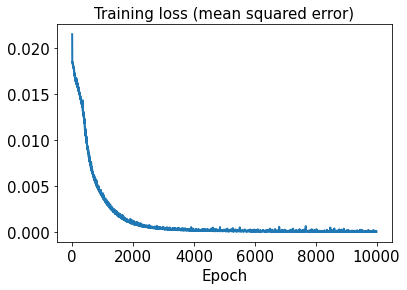

In [31]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

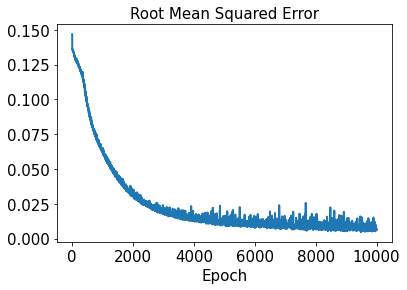

In [32]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [34]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [35]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

0.0017518275


In [36]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.05638199


In [37]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [38]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

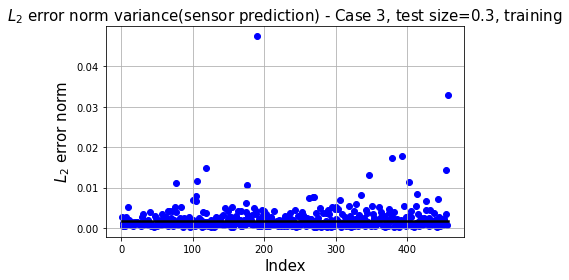

In [39]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 3, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

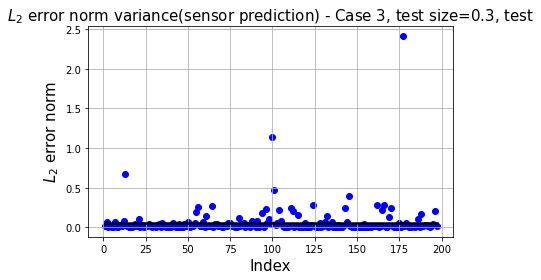

In [40]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 3, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [42]:
sd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             5130

In [43]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [44]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
12/12 [==============================] - 1s 22ms/step - loss: 0.0109 - rmse: 0.1035
Epoch 2/10000
12/12 [==============================] - 0s 7ms/step - loss: 0.0107 - rmse: 0.1027
Epoch 3/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0104 - rmse: 0.1013
Epoch 4/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0097 - rmse: 0.0978
Epoch 5/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0083 - rmse: 0.0901
Epoch 6/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0852
Epoch 7/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0838
Epoch 8/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 9/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0827
Epoch 10/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0817
Epoch 11/10000
12/12 [======

12/12 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0464
Epoch 85/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0461
Epoch 86/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0460
Epoch 87/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0457
Epoch 88/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0454
Epoch 89/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0451
Epoch 90/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0450
Epoch 91/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0448
Epoch 92/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0445
Epoch 93/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0442
Epoch 94/10000
12/12 [=============

12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0305
Epoch 168/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0304
Epoch 169/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0302
Epoch 170/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0300
Epoch 171/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0299
Epoch 172/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0298
Epoch 173/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0296
Epoch 174/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0295
Epoch 175/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0293
Epoch 176/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0292
Epoch 177/10000
12/12 [===

12/12 [==============================] - 0s 5ms/step - loss: 6.3340e-04 - rmse: 0.0215
Epoch 248/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3189e-04 - rmse: 0.0215
Epoch 249/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3061e-04 - rmse: 0.0214
Epoch 250/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2467e-04 - rmse: 0.0213
Epoch 251/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1869e-04 - rmse: 0.0212
Epoch 252/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1806e-04 - rmse: 0.0212
Epoch 253/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1410e-04 - rmse: 0.0211
Epoch 254/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1240e-04 - rmse: 0.0210
Epoch 255/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0907e-04 - rmse: 0.0209
Epoch 256/10000
12/12 [==============================] - 0s 6ms/step - loss: 6.0566e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 4.3898e-04 - rmse: 0.0164
Epoch 327/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3755e-04 - rmse: 0.0164
Epoch 328/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3511e-04 - rmse: 0.0163
Epoch 329/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3201e-04 - rmse: 0.0162
Epoch 330/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3162e-04 - rmse: 0.0162
Epoch 331/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2978e-04 - rmse: 0.0161
Epoch 332/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.2835e-04 - rmse: 0.0161
Epoch 333/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2476e-04 - rmse: 0.0160
Epoch 334/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2628e-04 - rmse: 0.0160
Epoch 335/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2341e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 3.3942e-04 - rmse: 0.0131
Epoch 406/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.4024e-04 - rmse: 0.0132
Epoch 407/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.3905e-04 - rmse: 0.0131
Epoch 408/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.3689e-04 - rmse: 0.0131
Epoch 409/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.3536e-04 - rmse: 0.0130
Epoch 410/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.3581e-04 - rmse: 0.0130
Epoch 411/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.3571e-04 - rmse: 0.0130
Epoch 412/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.3504e-04 - rmse: 0.0130
Epoch 413/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.3454e-04 - rmse: 0.0130
Epoch 414/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.3292e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 2.8374e-04 - rmse: 0.0110
Epoch 485/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.8269e-04 - rmse: 0.0110
Epoch 486/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.8250e-04 - rmse: 0.0110
Epoch 487/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.8162e-04 - rmse: 0.0109
Epoch 488/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.8118e-04 - rmse: 0.0109
Epoch 489/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.8094e-04 - rmse: 0.0109
Epoch 490/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7960e-04 - rmse: 0.0109
Epoch 491/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7932e-04 - rmse: 0.0108
Epoch 492/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7924e-04 - rmse: 0.0108
Epoch 493/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7774e-04 -

12/12 [==============================] - 0s 6ms/step - loss: 2.4715e-04 - rmse: 0.0095
Epoch 564/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4674e-04 - rmse: 0.0095
Epoch 565/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4650e-04 - rmse: 0.0095
Epoch 566/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4671e-04 - rmse: 0.0095
Epoch 567/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4662e-04 - rmse: 0.0095
Epoch 568/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4633e-04 - rmse: 0.0095
Epoch 569/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4527e-04 - rmse: 0.0094
Epoch 570/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4509e-04 - rmse: 0.0094
Epoch 571/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4466e-04 - rmse: 0.0094
Epoch 572/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4477e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 2.2339e-04 - rmse: 0.0085
Epoch 643/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2354e-04 - rmse: 0.0085
Epoch 644/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2329e-04 - rmse: 0.0085
Epoch 645/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2267e-04 - rmse: 0.0085
Epoch 646/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2202e-04 - rmse: 0.0084
Epoch 647/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2090e-04 - rmse: 0.0084
Epoch 648/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2079e-04 - rmse: 0.0084
Epoch 649/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2034e-04 - rmse: 0.0083
Epoch 650/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2071e-04 - rmse: 0.0084
Epoch 651/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2038e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 2.0434e-04 - rmse: 0.0077
Epoch 722/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0367e-04 - rmse: 0.0076
Epoch 723/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0312e-04 - rmse: 0.0076
Epoch 724/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0359e-04 - rmse: 0.0076
Epoch 725/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0291e-04 - rmse: 0.0076
Epoch 726/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0385e-04 - rmse: 0.0077
Epoch 727/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0250e-04 - rmse: 0.0076
Epoch 728/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0199e-04 - rmse: 0.0075
Epoch 729/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0196e-04 - rmse: 0.0076
Epoch 730/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0213e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 1.8916e-04 - rmse: 0.0070
Epoch 801/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8921e-04 - rmse: 0.0070
Epoch 802/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8919e-04 - rmse: 0.0070
Epoch 803/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8870e-04 - rmse: 0.0070
Epoch 804/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8825e-04 - rmse: 0.0070
Epoch 805/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8778e-04 - rmse: 0.0070
Epoch 806/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8824e-04 - rmse: 0.0070
Epoch 807/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8798e-04 - rmse: 0.0070
Epoch 808/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8813e-04 - rmse: 0.0070
Epoch 809/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8741e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 1.7626e-04 - rmse: 0.0065
Epoch 880/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7659e-04 - rmse: 0.0065
Epoch 881/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7663e-04 - rmse: 0.0065
Epoch 882/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7661e-04 - rmse: 0.0065
Epoch 883/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7630e-04 - rmse: 0.0065
Epoch 884/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7637e-04 - rmse: 0.0065
Epoch 885/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7620e-04 - rmse: 0.0065
Epoch 886/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7600e-04 - rmse: 0.0065
Epoch 887/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7595e-04 - rmse: 0.0065
Epoch 888/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7526e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 1.6656e-04 - rmse: 0.0062
Epoch 959/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6670e-04 - rmse: 0.0062
Epoch 960/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6617e-04 - rmse: 0.0061
Epoch 961/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6594e-04 - rmse: 0.0061
Epoch 962/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6613e-04 - rmse: 0.0061
Epoch 963/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.6662e-04 - rmse: 0.0062
Epoch 964/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6636e-04 - rmse: 0.0062
Epoch 965/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6698e-04 - rmse: 0.0062
Epoch 966/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6613e-04 - rmse: 0.0062
Epoch 967/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6531e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 1.5692e-04 - rmse: 0.0058
Epoch 1038/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.5665e-04 - rmse: 0.0058
Epoch 1039/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.5644e-04 - rmse: 0.0057
Epoch 1040/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.5651e-04 - rmse: 0.0058
Epoch 1041/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.5670e-04 - rmse: 0.0058
Epoch 1042/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.5783e-04 - rmse: 0.0059
Epoch 1043/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.5782e-04 - rmse: 0.0059
Epoch 1044/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.5688e-04 - rmse: 0.0058
Epoch 1045/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.5734e-04 - rmse: 0.0059
Epoch 1046/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.5

12/12 [==============================] - 0s 5ms/step - loss: 1.4927e-04 - rmse: 0.0055
Epoch 1116/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4956e-04 - rmse: 0.0056
Epoch 1117/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.4989e-04 - rmse: 0.0056
Epoch 1118/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4982e-04 - rmse: 0.0056
Epoch 1119/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4934e-04 - rmse: 0.0055
Epoch 1120/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4964e-04 - rmse: 0.0056
Epoch 1121/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4889e-04 - rmse: 0.0055
Epoch 1122/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4891e-04 - rmse: 0.0055
Epoch 1123/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4873e-04 - rmse: 0.0055
Epoch 1124/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4

12/12 [==============================] - 0s 5ms/step - loss: 1.4236e-04 - rmse: 0.0053
Epoch 1194/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.4191e-04 - rmse: 0.0053
Epoch 1195/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4193e-04 - rmse: 0.0053
Epoch 1196/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4212e-04 - rmse: 0.0053
Epoch 1197/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4186e-04 - rmse: 0.0053
Epoch 1198/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4172e-04 - rmse: 0.0053
Epoch 1199/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4159e-04 - rmse: 0.0053
Epoch 1200/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4141e-04 - rmse: 0.0052
Epoch 1201/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4122e-04 - rmse: 0.0052
Epoch 1202/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4

12/12 [==============================] - 0s 5ms/step - loss: 1.3617e-04 - rmse: 0.0051
Epoch 1272/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3627e-04 - rmse: 0.0051
Epoch 1273/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3597e-04 - rmse: 0.0051
Epoch 1274/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3584e-04 - rmse: 0.0051
Epoch 1275/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3602e-04 - rmse: 0.0051
Epoch 1276/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3561e-04 - rmse: 0.0051
Epoch 1277/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3531e-04 - rmse: 0.0050
Epoch 1278/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3521e-04 - rmse: 0.0050
Epoch 1279/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3531e-04 - rmse: 0.0051
Epoch 1280/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3

12/12 [==============================] - 0s 5ms/step - loss: 1.3040e-04 - rmse: 0.0049
Epoch 1350/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3032e-04 - rmse: 0.0049
Epoch 1351/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3034e-04 - rmse: 0.0049
Epoch 1352/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3034e-04 - rmse: 0.0049
Epoch 1353/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3063e-04 - rmse: 0.0050
Epoch 1354/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3104e-04 - rmse: 0.0050
Epoch 1355/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3071e-04 - rmse: 0.0050
Epoch 1356/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3084e-04 - rmse: 0.0050
Epoch 1357/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3147e-04 - rmse: 0.0051
Epoch 1358/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3

12/12 [==============================] - 0s 5ms/step - loss: 1.2545e-04 - rmse: 0.0048
Epoch 1428/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2530e-04 - rmse: 0.0048
Epoch 1429/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2556e-04 - rmse: 0.0048
Epoch 1430/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2520e-04 - rmse: 0.0048
Epoch 1431/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2549e-04 - rmse: 0.0048
Epoch 1432/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2502e-04 - rmse: 0.0048
Epoch 1433/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2474e-04 - rmse: 0.0047
Epoch 1434/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2488e-04 - rmse: 0.0047
Epoch 1435/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2487e-04 - rmse: 0.0048
Epoch 1436/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2

12/12 [==============================] - 0s 5ms/step - loss: 1.2067e-04 - rmse: 0.0046
Epoch 1506/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2114e-04 - rmse: 0.0047
Epoch 1507/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2101e-04 - rmse: 0.0047
Epoch 1508/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2070e-04 - rmse: 0.0046
Epoch 1509/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2089e-04 - rmse: 0.0047
Epoch 1510/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2118e-04 - rmse: 0.0047
Epoch 1511/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2124e-04 - rmse: 0.0047
Epoch 1512/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2073e-04 - rmse: 0.0047
Epoch 1513/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2052e-04 - rmse: 0.0046
Epoch 1514/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2

12/12 [==============================] - 0s 5ms/step - loss: 1.1694e-04 - rmse: 0.0046
Epoch 1584/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1701e-04 - rmse: 0.0046
Epoch 1585/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1659e-04 - rmse: 0.0045
Epoch 1586/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1615e-04 - rmse: 0.0045
Epoch 1587/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1591e-04 - rmse: 0.0045
Epoch 1588/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1609e-04 - rmse: 0.0045
Epoch 1589/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1592e-04 - rmse: 0.0045
Epoch 1590/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1598e-04 - rmse: 0.0045
Epoch 1591/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1600e-04 - rmse: 0.0045
Epoch 1592/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1

12/12 [==============================] - 0s 5ms/step - loss: 1.1364e-04 - rmse: 0.0045
Epoch 1662/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1347e-04 - rmse: 0.0045
Epoch 1663/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1326e-04 - rmse: 0.0045
Epoch 1664/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1277e-04 - rmse: 0.0044
Epoch 1665/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1266e-04 - rmse: 0.0044
Epoch 1666/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1222e-04 - rmse: 0.0044
Epoch 1667/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1201e-04 - rmse: 0.0044
Epoch 1668/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1198e-04 - rmse: 0.0044
Epoch 1669/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1186e-04 - rmse: 0.0044
Epoch 1670/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1

12/12 [==============================] - 0s 5ms/step - loss: 1.0894e-04 - rmse: 0.0043
Epoch 1740/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0877e-04 - rmse: 0.0043
Epoch 1741/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0893e-04 - rmse: 0.0043
Epoch 1742/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0952e-04 - rmse: 0.0044
Epoch 1743/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0897e-04 - rmse: 0.0043
Epoch 1744/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0912e-04 - rmse: 0.0044
Epoch 1745/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0916e-04 - rmse: 0.0044
Epoch 1746/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0877e-04 - rmse: 0.0043
Epoch 1747/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0875e-04 - rmse: 0.0043
Epoch 1748/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.0

12/12 [==============================] - 0s 5ms/step - loss: 1.0594e-04 - rmse: 0.0043
Epoch 1818/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0551e-04 - rmse: 0.0042
Epoch 1819/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0542e-04 - rmse: 0.0042
Epoch 1820/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0488e-04 - rmse: 0.0042
Epoch 1821/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0506e-04 - rmse: 0.0042
Epoch 1822/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0481e-04 - rmse: 0.0042
Epoch 1823/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0530e-04 - rmse: 0.0042
Epoch 1824/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.0521e-04 - rmse: 0.0042
Epoch 1825/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0527e-04 - rmse: 0.0042
Epoch 1826/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0

12/12 [==============================] - 0s 5ms/step - loss: 1.0300e-04 - rmse: 0.0042
Epoch 1896/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0315e-04 - rmse: 0.0042
Epoch 1897/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0247e-04 - rmse: 0.0042
Epoch 1898/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0280e-04 - rmse: 0.0042
Epoch 1899/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0295e-04 - rmse: 0.0042
Epoch 1900/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0321e-04 - rmse: 0.0043
Epoch 1901/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.0279e-04 - rmse: 0.0042
Epoch 1902/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0186e-04 - rmse: 0.0041
Epoch 1903/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0162e-04 - rmse: 0.0041
Epoch 1904/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0

12/12 [==============================] - 0s 5ms/step - loss: 9.9634e-05 - rmse: 0.0041
Epoch 1974/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.9389e-05 - rmse: 0.0041
Epoch 1975/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.8730e-05 - rmse: 0.0040
Epoch 1976/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.8809e-05 - rmse: 0.0040
Epoch 1977/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.9065e-05 - rmse: 0.0040
Epoch 1978/10000
12/12 [==============================] - 0s 6ms/step - loss: 9.9059e-05 - rmse: 0.0040
Epoch 1979/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.9224e-05 - rmse: 0.0041
Epoch 1980/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.8857e-05 - rmse: 0.0040
Epoch 1981/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.8922e-05 - rmse: 0.0040
Epoch 1982/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.9

12/12 [==============================] - 0s 5ms/step - loss: 9.6633e-05 - rmse: 0.0040
Epoch 2052/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.6225e-05 - rmse: 0.0039
Epoch 2053/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.6765e-05 - rmse: 0.0040
Epoch 2054/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.7155e-05 - rmse: 0.0041
Epoch 2055/10000
12/12 [==============================] - 0s 6ms/step - loss: 9.8417e-05 - rmse: 0.0042
Epoch 2056/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.9670e-05 - rmse: 0.0044
Epoch 2057/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.9075e-05 - rmse: 0.0043
Epoch 2058/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.8372e-05 - rmse: 0.0042
Epoch 2059/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.7281e-05 - rmse: 0.0041
Epoch 2060/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.7

12/12 [==============================] - 0s 5ms/step - loss: 9.4773e-05 - rmse: 0.0040
Epoch 2130/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.5081e-05 - rmse: 0.0040
Epoch 2131/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.4866e-05 - rmse: 0.0040
Epoch 2132/10000
12/12 [==============================] - 0s 6ms/step - loss: 9.4200e-05 - rmse: 0.0039
Epoch 2133/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.4133e-05 - rmse: 0.0039
Epoch 2134/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.3719e-05 - rmse: 0.0039
Epoch 2135/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.3830e-05 - rmse: 0.0039
Epoch 2136/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.4332e-05 - rmse: 0.0040
Epoch 2137/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.3283e-05 - rmse: 0.0038
Epoch 2138/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.3

12/12 [==============================] - 0s 5ms/step - loss: 9.2213e-05 - rmse: 0.0039
Epoch 2208/10000
12/12 [==============================] - 0s 6ms/step - loss: 9.2414e-05 - rmse: 0.0039
Epoch 2209/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.1994e-05 - rmse: 0.0039
Epoch 2210/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.1830e-05 - rmse: 0.0039
Epoch 2211/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.1673e-05 - rmse: 0.0039
Epoch 2212/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.1591e-05 - rmse: 0.0039
Epoch 2213/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.1588e-05 - rmse: 0.0039
Epoch 2214/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.1528e-05 - rmse: 0.0039
Epoch 2215/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.1388e-05 - rmse: 0.0038
Epoch 2216/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.1

12/12 [==============================] - 0s 6ms/step - loss: 8.9719e-05 - rmse: 0.0038
Epoch 2286/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.9695e-05 - rmse: 0.0038
Epoch 2287/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.9634e-05 - rmse: 0.0038
Epoch 2288/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.9553e-05 - rmse: 0.0038
Epoch 2289/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.8886e-05 - rmse: 0.0037
Epoch 2290/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.9055e-05 - rmse: 0.0038
Epoch 2291/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.9734e-05 - rmse: 0.0038
Epoch 2292/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.9231e-05 - rmse: 0.0038
Epoch 2293/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.9446e-05 - rmse: 0.0038
Epoch 2294/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.9

12/12 [==============================] - 0s 5ms/step - loss: 8.7480e-05 - rmse: 0.0038
Epoch 2364/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.7433e-05 - rmse: 0.0038
Epoch 2365/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.6973e-05 - rmse: 0.0037
Epoch 2366/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.6842e-05 - rmse: 0.0037
Epoch 2367/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.6908e-05 - rmse: 0.0037
Epoch 2368/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.7006e-05 - rmse: 0.0037
Epoch 2369/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.7543e-05 - rmse: 0.0038
Epoch 2370/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.7184e-05 - rmse: 0.0037
Epoch 2371/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.7084e-05 - rmse: 0.0037
Epoch 2372/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.6

12/12 [==============================] - 0s 5ms/step - loss: 8.5216e-05 - rmse: 0.0037
Epoch 2442/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.5195e-05 - rmse: 0.0037
Epoch 2443/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.5670e-05 - rmse: 0.0037
Epoch 2444/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.5524e-05 - rmse: 0.0037
Epoch 2445/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.5597e-05 - rmse: 0.0037
Epoch 2446/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.5509e-05 - rmse: 0.0037
Epoch 2447/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.5173e-05 - rmse: 0.0037
Epoch 2448/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.4879e-05 - rmse: 0.0036
Epoch 2449/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.4512e-05 - rmse: 0.0036
Epoch 2450/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.4

12/12 [==============================] - 0s 5ms/step - loss: 8.3039e-05 - rmse: 0.0036
Epoch 2520/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3238e-05 - rmse: 0.0036
Epoch 2521/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3361e-05 - rmse: 0.0036
Epoch 2522/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3337e-05 - rmse: 0.0036
Epoch 2523/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3315e-05 - rmse: 0.0036
Epoch 2524/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3080e-05 - rmse: 0.0036
Epoch 2525/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.2960e-05 - rmse: 0.0036
Epoch 2526/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3050e-05 - rmse: 0.0036
Epoch 2527/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3335e-05 - rmse: 0.0036
Epoch 2528/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3

12/12 [==============================] - 0s 5ms/step - loss: 8.1538e-05 - rmse: 0.0036
Epoch 2598/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.2028e-05 - rmse: 0.0036
Epoch 2599/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.2091e-05 - rmse: 0.0036
Epoch 2600/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.1572e-05 - rmse: 0.0036
Epoch 2601/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.1506e-05 - rmse: 0.0036
Epoch 2602/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.1870e-05 - rmse: 0.0036
Epoch 2603/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.1819e-05 - rmse: 0.0036
Epoch 2604/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.1726e-05 - rmse: 0.0036
Epoch 2605/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.1317e-05 - rmse: 0.0036
Epoch 2606/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.1

12/12 [==============================] - 0s 5ms/step - loss: 8.0453e-05 - rmse: 0.0036
Epoch 2676/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.0655e-05 - rmse: 0.0036
Epoch 2677/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.0498e-05 - rmse: 0.0036
Epoch 2678/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.0748e-05 - rmse: 0.0037
Epoch 2679/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.0318e-05 - rmse: 0.0036
Epoch 2680/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.9963e-05 - rmse: 0.0035
Epoch 2681/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.9953e-05 - rmse: 0.0035
Epoch 2682/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.9959e-05 - rmse: 0.0036
Epoch 2683/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.0062e-05 - rmse: 0.0036
Epoch 2684/10000
12/12 [==============================] - 0s 6ms/step - loss: 7.9

12/12 [==============================] - 0s 5ms/step - loss: 7.8406e-05 - rmse: 0.0035
Epoch 2754/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.8128e-05 - rmse: 0.0035
Epoch 2755/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.7896e-05 - rmse: 0.0034
Epoch 2756/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.8217e-05 - rmse: 0.0035
Epoch 2757/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.8299e-05 - rmse: 0.0035
Epoch 2758/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.8005e-05 - rmse: 0.0035
Epoch 2759/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.7874e-05 - rmse: 0.0034
Epoch 2760/10000
12/12 [==============================] - 0s 6ms/step - loss: 7.8298e-05 - rmse: 0.0035
Epoch 2761/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.8673e-05 - rmse: 0.0036
Epoch 2762/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.8

12/12 [==============================] - 0s 5ms/step - loss: 7.7010e-05 - rmse: 0.0035
Epoch 2832/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.6565e-05 - rmse: 0.0034
Epoch 2833/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.6467e-05 - rmse: 0.0034
Epoch 2834/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.6440e-05 - rmse: 0.0034
Epoch 2835/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.6715e-05 - rmse: 0.0034
Epoch 2836/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.6778e-05 - rmse: 0.0034
Epoch 2837/10000
12/12 [==============================] - 0s 6ms/step - loss: 7.6699e-05 - rmse: 0.0034
Epoch 2838/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.6780e-05 - rmse: 0.0035
Epoch 2839/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.7079e-05 - rmse: 0.0035
Epoch 2840/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.7

12/12 [==============================] - 0s 5ms/step - loss: 7.5149e-05 - rmse: 0.0034
Epoch 2910/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.5234e-05 - rmse: 0.0034
Epoch 2911/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.5322e-05 - rmse: 0.0034
Epoch 2912/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.5349e-05 - rmse: 0.0034
Epoch 2913/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.5399e-05 - rmse: 0.0034
Epoch 2914/10000
12/12 [==============================] - 0s 6ms/step - loss: 7.5146e-05 - rmse: 0.0034
Epoch 2915/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.5293e-05 - rmse: 0.0034
Epoch 2916/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.5477e-05 - rmse: 0.0034
Epoch 2917/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.5463e-05 - rmse: 0.0034
Epoch 2918/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.5

12/12 [==============================] - 0s 5ms/step - loss: 7.4578e-05 - rmse: 0.0034
Epoch 2988/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.4701e-05 - rmse: 0.0035
Epoch 2989/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.4545e-05 - rmse: 0.0034
Epoch 2990/10000
12/12 [==============================] - 0s 6ms/step - loss: 7.4348e-05 - rmse: 0.0034
Epoch 2991/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.4308e-05 - rmse: 0.0034
Epoch 2992/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.3812e-05 - rmse: 0.0033
Epoch 2993/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.3639e-05 - rmse: 0.0033
Epoch 2994/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.4019e-05 - rmse: 0.0034
Epoch 2995/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.4066e-05 - rmse: 0.0034
Epoch 2996/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.3

12/12 [==============================] - 0s 5ms/step - loss: 7.3471e-05 - rmse: 0.0034
Epoch 3066/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.3856e-05 - rmse: 0.0035
Epoch 3067/10000
12/12 [==============================] - 0s 6ms/step - loss: 7.3181e-05 - rmse: 0.0034
Epoch 3068/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.2962e-05 - rmse: 0.0034
Epoch 3069/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.2809e-05 - rmse: 0.0033
Epoch 3070/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.3016e-05 - rmse: 0.0034
Epoch 3071/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.2967e-05 - rmse: 0.0034
Epoch 3072/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.2648e-05 - rmse: 0.0033
Epoch 3073/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.2482e-05 - rmse: 0.0033
Epoch 3074/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.2

12/12 [==============================] - 0s 6ms/step - loss: 7.1841e-05 - rmse: 0.0033
Epoch 3144/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1474e-05 - rmse: 0.0033
Epoch 3145/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1355e-05 - rmse: 0.0033
Epoch 3146/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1597e-05 - rmse: 0.0033
Epoch 3147/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1143e-05 - rmse: 0.0032
Epoch 3148/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1466e-05 - rmse: 0.0033
Epoch 3149/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1514e-05 - rmse: 0.0033
Epoch 3150/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1538e-05 - rmse: 0.0033
Epoch 3151/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1504e-05 - rmse: 0.0033
Epoch 3152/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1

12/12 [==============================] - 0s 5ms/step - loss: 7.0720e-05 - rmse: 0.0033
Epoch 3222/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.0638e-05 - rmse: 0.0033
Epoch 3223/10000
12/12 [==============================] - 0s 6ms/step - loss: 7.0536e-05 - rmse: 0.0033
Epoch 3224/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.0428e-05 - rmse: 0.0033
Epoch 3225/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.0258e-05 - rmse: 0.0032
Epoch 3226/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.0124e-05 - rmse: 0.0032
Epoch 3227/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.0232e-05 - rmse: 0.0032
Epoch 3228/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.0509e-05 - rmse: 0.0033
Epoch 3229/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.0914e-05 - rmse: 0.0034
Epoch 3230/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.0

12/12 [==============================] - 0s 5ms/step - loss: 6.9326e-05 - rmse: 0.0032
Epoch 3300/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.9290e-05 - rmse: 0.0032
Epoch 3301/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.9126e-05 - rmse: 0.0032
Epoch 3302/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.9073e-05 - rmse: 0.0032
Epoch 3303/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.9373e-05 - rmse: 0.0032
Epoch 3304/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.9437e-05 - rmse: 0.0033
Epoch 3305/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.9409e-05 - rmse: 0.0033
Epoch 3306/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.9326e-05 - rmse: 0.0032
Epoch 3307/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.9158e-05 - rmse: 0.0032
Epoch 3308/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.9

12/12 [==============================] - 0s 5ms/step - loss: 6.8014e-05 - rmse: 0.0032
Epoch 3378/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.8133e-05 - rmse: 0.0032
Epoch 3379/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.8266e-05 - rmse: 0.0032
Epoch 3380/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.8433e-05 - rmse: 0.0032
Epoch 3381/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.8662e-05 - rmse: 0.0033
Epoch 3382/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.8230e-05 - rmse: 0.0032
Epoch 3383/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.8389e-05 - rmse: 0.0032
Epoch 3384/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.8077e-05 - rmse: 0.0032
Epoch 3385/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7870e-05 - rmse: 0.0032
Epoch 3386/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7

12/12 [==============================] - 0s 5ms/step - loss: 6.7990e-05 - rmse: 0.0033
Epoch 3456/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7973e-05 - rmse: 0.0033
Epoch 3457/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7634e-05 - rmse: 0.0032
Epoch 3458/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7531e-05 - rmse: 0.0032
Epoch 3459/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7619e-05 - rmse: 0.0032
Epoch 3460/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.6985e-05 - rmse: 0.0031
Epoch 3461/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7105e-05 - rmse: 0.0032
Epoch 3462/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.6849e-05 - rmse: 0.0031
Epoch 3463/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7216e-05 - rmse: 0.0032
Epoch 3464/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.6

12/12 [==============================] - 0s 5ms/step - loss: 6.6901e-05 - rmse: 0.0032
Epoch 3534/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.6717e-05 - rmse: 0.0032
Epoch 3535/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.6151e-05 - rmse: 0.0031
Epoch 3536/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.6741e-05 - rmse: 0.0032
Epoch 3537/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.6644e-05 - rmse: 0.0032
Epoch 3538/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.6598e-05 - rmse: 0.0032
Epoch 3539/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.6454e-05 - rmse: 0.0032
Epoch 3540/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.6646e-05 - rmse: 0.0032
Epoch 3541/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.6863e-05 - rmse: 0.0032
Epoch 3542/10000
12/12 [==============================] - 0s 6ms/step - loss: 6.8

12/12 [==============================] - 0s 5ms/step - loss: 6.5720e-05 - rmse: 0.0032
Epoch 3612/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5606e-05 - rmse: 0.0032
Epoch 3613/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5288e-05 - rmse: 0.0031
Epoch 3614/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5181e-05 - rmse: 0.0031
Epoch 3615/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5293e-05 - rmse: 0.0031
Epoch 3616/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5248e-05 - rmse: 0.0031
Epoch 3617/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5352e-05 - rmse: 0.0031
Epoch 3618/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5044e-05 - rmse: 0.0031
Epoch 3619/10000
12/12 [==============================] - 0s 6ms/step - loss: 6.4841e-05 - rmse: 0.0030
Epoch 3620/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5

12/12 [==============================] - 0s 5ms/step - loss: 6.4556e-05 - rmse: 0.0031
Epoch 3690/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4626e-05 - rmse: 0.0031
Epoch 3691/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4503e-05 - rmse: 0.0031
Epoch 3692/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4771e-05 - rmse: 0.0031
Epoch 3693/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4704e-05 - rmse: 0.0031
Epoch 3694/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4594e-05 - rmse: 0.0031
Epoch 3695/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4558e-05 - rmse: 0.0031
Epoch 3696/10000
12/12 [==============================] - 0s 6ms/step - loss: 6.4346e-05 - rmse: 0.0031
Epoch 3697/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4397e-05 - rmse: 0.0031
Epoch 3698/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4

12/12 [==============================] - 0s 5ms/step - loss: 6.4470e-05 - rmse: 0.0032
Epoch 3768/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4071e-05 - rmse: 0.0031
Epoch 3769/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3885e-05 - rmse: 0.0031
Epoch 3770/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4116e-05 - rmse: 0.0031
Epoch 3771/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4239e-05 - rmse: 0.0032
Epoch 3772/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3737e-05 - rmse: 0.0031
Epoch 3773/10000
12/12 [==============================] - 0s 6ms/step - loss: 6.3990e-05 - rmse: 0.0031
Epoch 3774/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3815e-05 - rmse: 0.0031
Epoch 3775/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3695e-05 - rmse: 0.0031
Epoch 3776/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3

12/12 [==============================] - 0s 5ms/step - loss: 6.3260e-05 - rmse: 0.0031
Epoch 3846/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3658e-05 - rmse: 0.0032
Epoch 3847/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3467e-05 - rmse: 0.0031
Epoch 3848/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2918e-05 - rmse: 0.0031
Epoch 3849/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2756e-05 - rmse: 0.0030
Epoch 3850/10000
12/12 [==============================] - 0s 6ms/step - loss: 6.2666e-05 - rmse: 0.0030
Epoch 3851/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2572e-05 - rmse: 0.0030
Epoch 3852/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2715e-05 - rmse: 0.0030
Epoch 3853/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2695e-05 - rmse: 0.0030
Epoch 3854/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2

12/12 [==============================] - 0s 5ms/step - loss: 6.3235e-05 - rmse: 0.0032
Epoch 3924/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2945e-05 - rmse: 0.0032
Epoch 3925/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2449e-05 - rmse: 0.0031
Epoch 3926/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2470e-05 - rmse: 0.0031
Epoch 3927/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2239e-05 - rmse: 0.0030
Epoch 3928/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2462e-05 - rmse: 0.0031
Epoch 3929/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2138e-05 - rmse: 0.0030
Epoch 3930/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2612e-05 - rmse: 0.0031
Epoch 3931/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2163e-05 - rmse: 0.0030
Epoch 3932/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1

12/12 [==============================] - 0s 5ms/step - loss: 6.1532e-05 - rmse: 0.0030
Epoch 4002/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1387e-05 - rmse: 0.0030
Epoch 4003/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1492e-05 - rmse: 0.0030
Epoch 4004/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1390e-05 - rmse: 0.0030
Epoch 4005/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1539e-05 - rmse: 0.0030
Epoch 4006/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1319e-05 - rmse: 0.0030
Epoch 4007/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1175e-05 - rmse: 0.0030
Epoch 4008/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1287e-05 - rmse: 0.0030
Epoch 4009/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1360e-05 - rmse: 0.0030
Epoch 4010/10000
12/12 [==============================] - 0s 6ms/step - loss: 6.1

12/12 [==============================] - 0s 5ms/step - loss: 6.0773e-05 - rmse: 0.0030
Epoch 4080/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0388e-05 - rmse: 0.0029
Epoch 4081/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0590e-05 - rmse: 0.0030
Epoch 4082/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0507e-05 - rmse: 0.0030
Epoch 4083/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0799e-05 - rmse: 0.0030
Epoch 4084/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0850e-05 - rmse: 0.0030
Epoch 4085/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0909e-05 - rmse: 0.0030
Epoch 4086/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0621e-05 - rmse: 0.0030
Epoch 4087/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0357e-05 - rmse: 0.0029
Epoch 4088/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0

12/12 [==============================] - 0s 5ms/step - loss: 6.0033e-05 - rmse: 0.0030
Epoch 4158/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9802e-05 - rmse: 0.0029
Epoch 4159/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0253e-05 - rmse: 0.0030
Epoch 4160/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0100e-05 - rmse: 0.0030
Epoch 4161/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0110e-05 - rmse: 0.0030
Epoch 4162/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9848e-05 - rmse: 0.0029
Epoch 4163/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9859e-05 - rmse: 0.0029
Epoch 4164/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9919e-05 - rmse: 0.0030
Epoch 4165/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0044e-05 - rmse: 0.0030
Epoch 4166/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0

12/12 [==============================] - 0s 5ms/step - loss: 5.9418e-05 - rmse: 0.0030
Epoch 4236/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.9874e-05 - rmse: 0.0030
Epoch 4237/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9592e-05 - rmse: 0.0030
Epoch 4238/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9857e-05 - rmse: 0.0030
Epoch 4239/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9629e-05 - rmse: 0.0030
Epoch 4240/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9659e-05 - rmse: 0.0030
Epoch 4241/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9668e-05 - rmse: 0.0030
Epoch 4242/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9197e-05 - rmse: 0.0029
Epoch 4243/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8945e-05 - rmse: 0.0029
Epoch 4244/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9

12/12 [==============================] - 0s 5ms/step - loss: 5.8397e-05 - rmse: 0.0029
Epoch 4314/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8719e-05 - rmse: 0.0029
Epoch 4315/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8378e-05 - rmse: 0.0029
Epoch 4316/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8189e-05 - rmse: 0.0028
Epoch 4317/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.8347e-05 - rmse: 0.0029
Epoch 4318/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8310e-05 - rmse: 0.0029
Epoch 4319/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8281e-05 - rmse: 0.0029
Epoch 4320/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8531e-05 - rmse: 0.0029
Epoch 4321/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8614e-05 - rmse: 0.0029
Epoch 4322/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8

12/12 [==============================] - 0s 5ms/step - loss: 5.7830e-05 - rmse: 0.0029
Epoch 4392/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7827e-05 - rmse: 0.0029
Epoch 4393/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7845e-05 - rmse: 0.0029
Epoch 4394/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7830e-05 - rmse: 0.0029
Epoch 4395/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8048e-05 - rmse: 0.0029
Epoch 4396/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7953e-05 - rmse: 0.0029
Epoch 4397/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7903e-05 - rmse: 0.0029
Epoch 4398/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.7919e-05 - rmse: 0.0029
Epoch 4399/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8278e-05 - rmse: 0.0029
Epoch 4400/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7

12/12 [==============================] - 0s 5ms/step - loss: 5.7881e-05 - rmse: 0.0030
Epoch 4470/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7409e-05 - rmse: 0.0029
Epoch 4471/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7276e-05 - rmse: 0.0029
Epoch 4472/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7575e-05 - rmse: 0.0029
Epoch 4473/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8389e-05 - rmse: 0.0030
Epoch 4474/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8252e-05 - rmse: 0.0030
Epoch 4475/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7798e-05 - rmse: 0.0029
Epoch 4476/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7539e-05 - rmse: 0.0029
Epoch 4477/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7159e-05 - rmse: 0.0028
Epoch 4478/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6

12/12 [==============================] - 0s 5ms/step - loss: 5.7383e-05 - rmse: 0.0029
Epoch 4548/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7322e-05 - rmse: 0.0029
Epoch 4549/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7493e-05 - rmse: 0.0030
Epoch 4550/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7081e-05 - rmse: 0.0029
Epoch 4551/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7154e-05 - rmse: 0.0029
Epoch 4552/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7437e-05 - rmse: 0.0030
Epoch 4553/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7366e-05 - rmse: 0.0030
Epoch 4554/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7243e-05 - rmse: 0.0029
Epoch 4555/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7122e-05 - rmse: 0.0029
Epoch 4556/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6

12/12 [==============================] - 0s 5ms/step - loss: 5.6224e-05 - rmse: 0.0028
Epoch 4626/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6455e-05 - rmse: 0.0029
Epoch 4627/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6249e-05 - rmse: 0.0028
Epoch 4628/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6521e-05 - rmse: 0.0029
Epoch 4629/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6523e-05 - rmse: 0.0029
Epoch 4630/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6328e-05 - rmse: 0.0028
Epoch 4631/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6808e-05 - rmse: 0.0029
Epoch 4632/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6499e-05 - rmse: 0.0029
Epoch 4633/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6276e-05 - rmse: 0.0028
Epoch 4634/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6

12/12 [==============================] - 0s 5ms/step - loss: 5.5787e-05 - rmse: 0.0028
Epoch 4704/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6344e-05 - rmse: 0.0029
Epoch 4705/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6141e-05 - rmse: 0.0029
Epoch 4706/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.6013e-05 - rmse: 0.0029
Epoch 4707/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5978e-05 - rmse: 0.0029
Epoch 4708/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5962e-05 - rmse: 0.0029
Epoch 4709/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5708e-05 - rmse: 0.0028
Epoch 4710/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5441e-05 - rmse: 0.0028
Epoch 4711/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5580e-05 - rmse: 0.0028
Epoch 4712/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5

12/12 [==============================] - 0s 5ms/step - loss: 5.5481e-05 - rmse: 0.0028
Epoch 4782/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5498e-05 - rmse: 0.0028
Epoch 4783/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5871e-05 - rmse: 0.0029
Epoch 4784/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5988e-05 - rmse: 0.0029
Epoch 4785/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5485e-05 - rmse: 0.0028
Epoch 4786/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5272e-05 - rmse: 0.0028
Epoch 4787/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5247e-05 - rmse: 0.0028
Epoch 4788/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4991e-05 - rmse: 0.0028
Epoch 4789/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4973e-05 - rmse: 0.0028
Epoch 4790/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5

12/12 [==============================] - 0s 5ms/step - loss: 5.5001e-05 - rmse: 0.0028
Epoch 4860/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4696e-05 - rmse: 0.0028
Epoch 4861/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4721e-05 - rmse: 0.0028
Epoch 4862/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4641e-05 - rmse: 0.0028
Epoch 4863/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4560e-05 - rmse: 0.0028
Epoch 4864/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4633e-05 - rmse: 0.0028
Epoch 4865/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4879e-05 - rmse: 0.0028
Epoch 4866/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5402e-05 - rmse: 0.0029
Epoch 4867/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.5360e-05 - rmse: 0.0029
Epoch 4868/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5

12/12 [==============================] - 0s 5ms/step - loss: 5.3976e-05 - rmse: 0.0027
Epoch 4938/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4012e-05 - rmse: 0.0027
Epoch 4939/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4190e-05 - rmse: 0.0028
Epoch 4940/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4150e-05 - rmse: 0.0028
Epoch 4941/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4319e-05 - rmse: 0.0028
Epoch 4942/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4389e-05 - rmse: 0.0028
Epoch 4943/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4649e-05 - rmse: 0.0028
Epoch 4944/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5094e-05 - rmse: 0.0029
Epoch 4945/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4540e-05 - rmse: 0.0028
Epoch 4946/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4

12/12 [==============================] - 0s 5ms/step - loss: 5.3617e-05 - rmse: 0.0027
Epoch 5016/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3538e-05 - rmse: 0.0027
Epoch 5017/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3157e-05 - rmse: 0.0026
Epoch 5018/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3323e-05 - rmse: 0.0027
Epoch 5019/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3429e-05 - rmse: 0.0027
Epoch 5020/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4132e-05 - rmse: 0.0028
Epoch 5021/10000
12/12 [==============================] - 0s 4ms/step - loss: 5.4413e-05 - rmse: 0.0029
Epoch 5022/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4099e-05 - rmse: 0.0028
Epoch 5023/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4164e-05 - rmse: 0.0028
Epoch 5024/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4

12/12 [==============================] - 0s 5ms/step - loss: 5.3366e-05 - rmse: 0.0027
Epoch 5094/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.3291e-05 - rmse: 0.0027
Epoch 5095/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.3212e-05 - rmse: 0.0027
Epoch 5096/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3345e-05 - rmse: 0.0027
Epoch 5097/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3327e-05 - rmse: 0.0027
Epoch 5098/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3345e-05 - rmse: 0.0027
Epoch 5099/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3310e-05 - rmse: 0.0027
Epoch 5100/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.3067e-05 - rmse: 0.0027
Epoch 5101/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3002e-05 - rmse: 0.0027
Epoch 5102/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3

12/12 [==============================] - 0s 6ms/step - loss: 5.2829e-05 - rmse: 0.0027
Epoch 5172/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.3111e-05 - rmse: 0.0028
Epoch 5173/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3261e-05 - rmse: 0.0028
Epoch 5174/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.3177e-05 - rmse: 0.0028
Epoch 5175/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.2981e-05 - rmse: 0.0027
Epoch 5176/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2950e-05 - rmse: 0.0027
Epoch 5177/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2968e-05 - rmse: 0.0027
Epoch 5178/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.3238e-05 - rmse: 0.0028
Epoch 5179/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3010e-05 - rmse: 0.0028
Epoch 5180/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2

12/12 [==============================] - 0s 5ms/step - loss: 5.2950e-05 - rmse: 0.0028
Epoch 5250/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2657e-05 - rmse: 0.0027
Epoch 5251/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2637e-05 - rmse: 0.0027
Epoch 5252/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2615e-05 - rmse: 0.0027
Epoch 5253/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2516e-05 - rmse: 0.0027
Epoch 5254/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3753e-05 - rmse: 0.0029
Epoch 5255/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3882e-05 - rmse: 0.0030
Epoch 5256/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.3515e-05 - rmse: 0.0029
Epoch 5257/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2892e-05 - rmse: 0.0028
Epoch 5258/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2

12/12 [==============================] - 0s 5ms/step - loss: 5.2203e-05 - rmse: 0.0027
Epoch 5328/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1944e-05 - rmse: 0.0027
Epoch 5329/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2054e-05 - rmse: 0.0027
Epoch 5330/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2062e-05 - rmse: 0.0027
Epoch 5331/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1999e-05 - rmse: 0.0027
Epoch 5332/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2299e-05 - rmse: 0.0027
Epoch 5333/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2580e-05 - rmse: 0.0028
Epoch 5334/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2995e-05 - rmse: 0.0029
Epoch 5335/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3273e-05 - rmse: 0.0029
Epoch 5336/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2

12/12 [==============================] - 0s 5ms/step - loss: 5.1477e-05 - rmse: 0.0027
Epoch 5406/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1573e-05 - rmse: 0.0027
Epoch 5407/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1722e-05 - rmse: 0.0027
Epoch 5408/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1921e-05 - rmse: 0.0027
Epoch 5409/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1545e-05 - rmse: 0.0027
Epoch 5410/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1853e-05 - rmse: 0.0027
Epoch 5411/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1601e-05 - rmse: 0.0027
Epoch 5412/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.1976e-05 - rmse: 0.0027
Epoch 5413/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1630e-05 - rmse: 0.0027
Epoch 5414/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1

12/12 [==============================] - 0s 5ms/step - loss: 5.1552e-05 - rmse: 0.0027
Epoch 5484/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1047e-05 - rmse: 0.0026
Epoch 5485/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1067e-05 - rmse: 0.0026
Epoch 5486/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1017e-05 - rmse: 0.0026
Epoch 5487/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1326e-05 - rmse: 0.0027
Epoch 5488/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1583e-05 - rmse: 0.0027
Epoch 5489/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1729e-05 - rmse: 0.0028
Epoch 5490/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2281e-05 - rmse: 0.0029
Epoch 5491/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.1836e-05 - rmse: 0.0028
Epoch 5492/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1

12/12 [==============================] - 0s 5ms/step - loss: 5.0975e-05 - rmse: 0.0027
Epoch 5562/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1241e-05 - rmse: 0.0027
Epoch 5563/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1158e-05 - rmse: 0.0027
Epoch 5564/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0794e-05 - rmse: 0.0026
Epoch 5565/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0803e-05 - rmse: 0.0026
Epoch 5566/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0796e-05 - rmse: 0.0026
Epoch 5567/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0696e-05 - rmse: 0.0026
Epoch 5568/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0962e-05 - rmse: 0.0027
Epoch 5569/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0754e-05 - rmse: 0.0026
Epoch 5570/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.1

12/12 [==============================] - 0s 5ms/step - loss: 5.0769e-05 - rmse: 0.0027
Epoch 5640/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0624e-05 - rmse: 0.0027
Epoch 5641/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0635e-05 - rmse: 0.0027
Epoch 5642/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0567e-05 - rmse: 0.0027
Epoch 5643/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0612e-05 - rmse: 0.0027
Epoch 5644/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0838e-05 - rmse: 0.0027
Epoch 5645/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0311e-05 - rmse: 0.0026
Epoch 5646/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0301e-05 - rmse: 0.0026
Epoch 5647/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0077e-05 - rmse: 0.0026
Epoch 5648/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0

12/12 [==============================] - 0s 5ms/step - loss: 5.0650e-05 - rmse: 0.0027
Epoch 5718/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0054e-05 - rmse: 0.0026
Epoch 5719/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9923e-05 - rmse: 0.0026
Epoch 5720/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9783e-05 - rmse: 0.0026
Epoch 5721/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9832e-05 - rmse: 0.0026
Epoch 5722/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9797e-05 - rmse: 0.0026
Epoch 5723/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9721e-05 - rmse: 0.0026
Epoch 5724/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9825e-05 - rmse: 0.0026
Epoch 5725/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9887e-05 - rmse: 0.0026
Epoch 5726/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0

12/12 [==============================] - 0s 5ms/step - loss: 4.9867e-05 - rmse: 0.0026
Epoch 5796/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9620e-05 - rmse: 0.0026
Epoch 5797/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0280e-05 - rmse: 0.0027
Epoch 5798/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9884e-05 - rmse: 0.0026
Epoch 5799/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9727e-05 - rmse: 0.0026
Epoch 5800/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9573e-05 - rmse: 0.0026
Epoch 5801/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9607e-05 - rmse: 0.0026
Epoch 5802/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0103e-05 - rmse: 0.0027
Epoch 5803/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9721e-05 - rmse: 0.0026
Epoch 5804/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9

12/12 [==============================] - 0s 5ms/step - loss: 4.9907e-05 - rmse: 0.0027
Epoch 5874/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9802e-05 - rmse: 0.0027
Epoch 5875/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9644e-05 - rmse: 0.0026
Epoch 5876/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9664e-05 - rmse: 0.0026
Epoch 5877/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9416e-05 - rmse: 0.0026
Epoch 5878/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9314e-05 - rmse: 0.0026
Epoch 5879/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9468e-05 - rmse: 0.0026
Epoch 5880/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9271e-05 - rmse: 0.0026
Epoch 5881/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9619e-05 - rmse: 0.0026
Epoch 5882/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9

12/12 [==============================] - 0s 5ms/step - loss: 4.8869e-05 - rmse: 0.0025
Epoch 5952/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8945e-05 - rmse: 0.0026
Epoch 5953/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8922e-05 - rmse: 0.0026
Epoch 5954/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8790e-05 - rmse: 0.0025
Epoch 5955/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9013e-05 - rmse: 0.0026
Epoch 5956/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8920e-05 - rmse: 0.0026
Epoch 5957/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8844e-05 - rmse: 0.0025
Epoch 5958/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8929e-05 - rmse: 0.0026
Epoch 5959/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9144e-05 - rmse: 0.0026
Epoch 5960/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9

12/12 [==============================] - 0s 5ms/step - loss: 4.8628e-05 - rmse: 0.0025
Epoch 6030/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8943e-05 - rmse: 0.0026
Epoch 6031/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8804e-05 - rmse: 0.0026
Epoch 6032/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9012e-05 - rmse: 0.0026
Epoch 6033/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9303e-05 - rmse: 0.0027
Epoch 6034/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9495e-05 - rmse: 0.0027
Epoch 6035/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8727e-05 - rmse: 0.0026
Epoch 6036/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8786e-05 - rmse: 0.0026
Epoch 6037/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9047e-05 - rmse: 0.0026
Epoch 6038/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9

12/12 [==============================] - 0s 5ms/step - loss: 4.8587e-05 - rmse: 0.0026
Epoch 6108/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8790e-05 - rmse: 0.0026
Epoch 6109/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8771e-05 - rmse: 0.0026
Epoch 6110/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8649e-05 - rmse: 0.0026
Epoch 6111/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8754e-05 - rmse: 0.0026
Epoch 6112/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8609e-05 - rmse: 0.0026
Epoch 6113/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8260e-05 - rmse: 0.0025
Epoch 6114/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8729e-05 - rmse: 0.0026
Epoch 6115/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8572e-05 - rmse: 0.0026
Epoch 6116/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8

12/12 [==============================] - 0s 5ms/step - loss: 4.8532e-05 - rmse: 0.0026
Epoch 6186/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8279e-05 - rmse: 0.0026
Epoch 6187/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8352e-05 - rmse: 0.0026
Epoch 6188/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7826e-05 - rmse: 0.0025
Epoch 6189/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7756e-05 - rmse: 0.0025
Epoch 6190/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8282e-05 - rmse: 0.0026
Epoch 6191/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8154e-05 - rmse: 0.0026
Epoch 6192/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7963e-05 - rmse: 0.0025
Epoch 6193/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7886e-05 - rmse: 0.0025
Epoch 6194/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8

12/12 [==============================] - 0s 6ms/step - loss: 4.8278e-05 - rmse: 0.0026
Epoch 6264/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8320e-05 - rmse: 0.0026
Epoch 6265/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8288e-05 - rmse: 0.0026
Epoch 6266/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8167e-05 - rmse: 0.0026
Epoch 6267/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8190e-05 - rmse: 0.0026
Epoch 6268/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8184e-05 - rmse: 0.0026
Epoch 6269/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7714e-05 - rmse: 0.0025
Epoch 6270/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7855e-05 - rmse: 0.0025
Epoch 6271/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7897e-05 - rmse: 0.0026
Epoch 6272/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7

12/12 [==============================] - 0s 5ms/step - loss: 4.7696e-05 - rmse: 0.0026
Epoch 6342/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.7411e-05 - rmse: 0.0025
Epoch 6343/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7532e-05 - rmse: 0.0025
Epoch 6344/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7465e-05 - rmse: 0.0025
Epoch 6345/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8301e-05 - rmse: 0.0027
Epoch 6346/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8398e-05 - rmse: 0.0027
Epoch 6347/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8431e-05 - rmse: 0.0027
Epoch 6348/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8787e-05 - rmse: 0.0028
Epoch 6349/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8063e-05 - rmse: 0.0026
Epoch 6350/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7

12/12 [==============================] - 0s 5ms/step - loss: 4.7452e-05 - rmse: 0.0025
Epoch 6420/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7616e-05 - rmse: 0.0026
Epoch 6421/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.7352e-05 - rmse: 0.0025
Epoch 6422/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7140e-05 - rmse: 0.0025
Epoch 6423/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7266e-05 - rmse: 0.0025
Epoch 6424/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7567e-05 - rmse: 0.0026
Epoch 6425/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7527e-05 - rmse: 0.0026
Epoch 6426/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7201e-05 - rmse: 0.0025
Epoch 6427/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7125e-05 - rmse: 0.0025
Epoch 6428/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7

12/12 [==============================] - 0s 5ms/step - loss: 4.6814e-05 - rmse: 0.0025
Epoch 6498/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7117e-05 - rmse: 0.0025
Epoch 6499/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7309e-05 - rmse: 0.0026
Epoch 6500/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7344e-05 - rmse: 0.0026
Epoch 6501/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7668e-05 - rmse: 0.0026
Epoch 6502/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7285e-05 - rmse: 0.0026
Epoch 6503/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6941e-05 - rmse: 0.0025
Epoch 6504/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7121e-05 - rmse: 0.0025
Epoch 6505/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7390e-05 - rmse: 0.0026
Epoch 6506/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7

12/12 [==============================] - 0s 5ms/step - loss: 4.6580e-05 - rmse: 0.0025
Epoch 6576/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6409e-05 - rmse: 0.0024
Epoch 6577/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6478e-05 - rmse: 0.0024
Epoch 6578/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.6529e-05 - rmse: 0.0025
Epoch 6579/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6567e-05 - rmse: 0.0025
Epoch 6580/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6763e-05 - rmse: 0.0025
Epoch 6581/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6703e-05 - rmse: 0.0025
Epoch 6582/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6843e-05 - rmse: 0.0025
Epoch 6583/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7214e-05 - rmse: 0.0026
Epoch 6584/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7

12/12 [==============================] - 0s 5ms/step - loss: 4.6981e-05 - rmse: 0.0026
Epoch 6654/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6778e-05 - rmse: 0.0025
Epoch 6655/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6596e-05 - rmse: 0.0025
Epoch 6656/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6443e-05 - rmse: 0.0025
Epoch 6657/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.6614e-05 - rmse: 0.0025
Epoch 6658/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6565e-05 - rmse: 0.0025
Epoch 6659/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6469e-05 - rmse: 0.0025
Epoch 6660/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6594e-05 - rmse: 0.0025
Epoch 6661/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6586e-05 - rmse: 0.0025
Epoch 6662/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6

12/12 [==============================] - 0s 5ms/step - loss: 4.6537e-05 - rmse: 0.0025
Epoch 6732/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6627e-05 - rmse: 0.0026
Epoch 6733/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6501e-05 - rmse: 0.0025
Epoch 6734/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6159e-05 - rmse: 0.0025
Epoch 6735/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5911e-05 - rmse: 0.0024
Epoch 6736/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.5742e-05 - rmse: 0.0024
Epoch 6737/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5820e-05 - rmse: 0.0024
Epoch 6738/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6031e-05 - rmse: 0.0024
Epoch 6739/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5937e-05 - rmse: 0.0024
Epoch 6740/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5

12/12 [==============================] - 0s 5ms/step - loss: 4.5626e-05 - rmse: 0.0024
Epoch 6810/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5822e-05 - rmse: 0.0024
Epoch 6811/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6042e-05 - rmse: 0.0025
Epoch 6812/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5788e-05 - rmse: 0.0024
Epoch 6813/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5704e-05 - rmse: 0.0024
Epoch 6814/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5855e-05 - rmse: 0.0024
Epoch 6815/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.5590e-05 - rmse: 0.0024
Epoch 6816/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5755e-05 - rmse: 0.0024
Epoch 6817/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5771e-05 - rmse: 0.0024
Epoch 6818/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6

12/12 [==============================] - 0s 5ms/step - loss: 4.5628e-05 - rmse: 0.0024
Epoch 6888/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6070e-05 - rmse: 0.0025
Epoch 6889/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5986e-05 - rmse: 0.0025
Epoch 6890/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6388e-05 - rmse: 0.0026
Epoch 6891/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6550e-05 - rmse: 0.0026
Epoch 6892/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6239e-05 - rmse: 0.0026
Epoch 6893/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.6136e-05 - rmse: 0.0025
Epoch 6894/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6623e-05 - rmse: 0.0026
Epoch 6895/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7103e-05 - rmse: 0.0027
Epoch 6896/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7

12/12 [==============================] - 0s 5ms/step - loss: 4.7065e-05 - rmse: 0.0028
Epoch 6966/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7472e-05 - rmse: 0.0028
Epoch 6967/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7248e-05 - rmse: 0.0028
Epoch 6968/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7503e-05 - rmse: 0.0028
Epoch 6969/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7218e-05 - rmse: 0.0028
Epoch 6970/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7633e-05 - rmse: 0.0029
Epoch 6971/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7068e-05 - rmse: 0.0028
Epoch 6972/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.6426e-05 - rmse: 0.0026
Epoch 6973/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6679e-05 - rmse: 0.0027
Epoch 6974/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6

12/12 [==============================] - 0s 5ms/step - loss: 4.5458e-05 - rmse: 0.0025
Epoch 7044/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5301e-05 - rmse: 0.0024
Epoch 7045/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5315e-05 - rmse: 0.0025
Epoch 7046/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5366e-05 - rmse: 0.0025
Epoch 7047/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5087e-05 - rmse: 0.0024
Epoch 7048/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4959e-05 - rmse: 0.0024
Epoch 7049/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5198e-05 - rmse: 0.0024
Epoch 7050/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5163e-05 - rmse: 0.0024
Epoch 7051/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.5284e-05 - rmse: 0.0024
Epoch 7052/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5

12/12 [==============================] - 0s 5ms/step - loss: 4.6124e-05 - rmse: 0.0026
Epoch 7122/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5322e-05 - rmse: 0.0025
Epoch 7123/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5115e-05 - rmse: 0.0024
Epoch 7124/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5017e-05 - rmse: 0.0024
Epoch 7125/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4918e-05 - rmse: 0.0024
Epoch 7126/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5029e-05 - rmse: 0.0024
Epoch 7127/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5291e-05 - rmse: 0.0025
Epoch 7128/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5544e-05 - rmse: 0.0025
Epoch 7129/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5260e-05 - rmse: 0.0025
Epoch 7130/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.4

12/12 [==============================] - 0s 5ms/step - loss: 4.4838e-05 - rmse: 0.0024
Epoch 7200/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5042e-05 - rmse: 0.0025
Epoch 7201/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5517e-05 - rmse: 0.0026
Epoch 7202/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5105e-05 - rmse: 0.0025
Epoch 7203/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5021e-05 - rmse: 0.0025
Epoch 7204/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4848e-05 - rmse: 0.0024
Epoch 7205/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4786e-05 - rmse: 0.0024
Epoch 7206/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4599e-05 - rmse: 0.0024
Epoch 7207/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4527e-05 - rmse: 0.0024
Epoch 7208/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.5

12/12 [==============================] - 0s 5ms/step - loss: 4.4396e-05 - rmse: 0.0024
Epoch 7278/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4647e-05 - rmse: 0.0024
Epoch 7279/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5015e-05 - rmse: 0.0025
Epoch 7280/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5235e-05 - rmse: 0.0025
Epoch 7281/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4800e-05 - rmse: 0.0025
Epoch 7282/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4840e-05 - rmse: 0.0025
Epoch 7283/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4676e-05 - rmse: 0.0024
Epoch 7284/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4259e-05 - rmse: 0.0023
Epoch 7285/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4347e-05 - rmse: 0.0024
Epoch 7286/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4

12/12 [==============================] - 0s 5ms/step - loss: 4.5588e-05 - rmse: 0.0026
Epoch 7356/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4939e-05 - rmse: 0.0025
Epoch 7357/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4926e-05 - rmse: 0.0025
Epoch 7358/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4949e-05 - rmse: 0.0025
Epoch 7359/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4965e-05 - rmse: 0.0025
Epoch 7360/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4939e-05 - rmse: 0.0025
Epoch 7361/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5283e-05 - rmse: 0.0026
Epoch 7362/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5768e-05 - rmse: 0.0027
Epoch 7363/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5311e-05 - rmse: 0.0026
Epoch 7364/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5

12/12 [==============================] - 0s 5ms/step - loss: 4.3982e-05 - rmse: 0.0024
Epoch 7434/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4493e-05 - rmse: 0.0025
Epoch 7435/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4447e-05 - rmse: 0.0025
Epoch 7436/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4562e-05 - rmse: 0.0025
Epoch 7437/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4330e-05 - rmse: 0.0024
Epoch 7438/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4364e-05 - rmse: 0.0024
Epoch 7439/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4468e-05 - rmse: 0.0025
Epoch 7440/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4095e-05 - rmse: 0.0024
Epoch 7441/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4135e-05 - rmse: 0.0024
Epoch 7442/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3

12/12 [==============================] - 0s 5ms/step - loss: 4.4132e-05 - rmse: 0.0024
Epoch 7512/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3992e-05 - rmse: 0.0024
Epoch 7513/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4064e-05 - rmse: 0.0024
Epoch 7514/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4100e-05 - rmse: 0.0024
Epoch 7515/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3904e-05 - rmse: 0.0024
Epoch 7516/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4441e-05 - rmse: 0.0025
Epoch 7517/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4408e-05 - rmse: 0.0025
Epoch 7518/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4250e-05 - rmse: 0.0024
Epoch 7519/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3755e-05 - rmse: 0.0023
Epoch 7520/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3

12/12 [==============================] - 0s 5ms/step - loss: 4.3908e-05 - rmse: 0.0024
Epoch 7590/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3735e-05 - rmse: 0.0024
Epoch 7591/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3670e-05 - rmse: 0.0024
Epoch 7592/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4183e-05 - rmse: 0.0025
Epoch 7593/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4048e-05 - rmse: 0.0024
Epoch 7594/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3731e-05 - rmse: 0.0024
Epoch 7595/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3513e-05 - rmse: 0.0023
Epoch 7596/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3543e-05 - rmse: 0.0023
Epoch 7597/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3402e-05 - rmse: 0.0023
Epoch 7598/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3

12/12 [==============================] - 0s 5ms/step - loss: 4.3413e-05 - rmse: 0.0023
Epoch 7668/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3416e-05 - rmse: 0.0023
Epoch 7669/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3404e-05 - rmse: 0.0023
Epoch 7670/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3301e-05 - rmse: 0.0023
Epoch 7671/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3486e-05 - rmse: 0.0024
Epoch 7672/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3281e-05 - rmse: 0.0023
Epoch 7673/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3100e-05 - rmse: 0.0023
Epoch 7674/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3317e-05 - rmse: 0.0023
Epoch 7675/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3331e-05 - rmse: 0.0023
Epoch 7676/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3

12/12 [==============================] - 0s 5ms/step - loss: 4.3294e-05 - rmse: 0.0023
Epoch 7746/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3396e-05 - rmse: 0.0024
Epoch 7747/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3605e-05 - rmse: 0.0024
Epoch 7748/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3713e-05 - rmse: 0.0024
Epoch 7749/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3705e-05 - rmse: 0.0024
Epoch 7750/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3343e-05 - rmse: 0.0024
Epoch 7751/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3530e-05 - rmse: 0.0024
Epoch 7752/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3680e-05 - rmse: 0.0024
Epoch 7753/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3550e-05 - rmse: 0.0024
Epoch 7754/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3

12/12 [==============================] - 0s 6ms/step - loss: 4.3137e-05 - rmse: 0.0023
Epoch 7824/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3216e-05 - rmse: 0.0024
Epoch 7825/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3208e-05 - rmse: 0.0024
Epoch 7826/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3315e-05 - rmse: 0.0024
Epoch 7827/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3104e-05 - rmse: 0.0023
Epoch 7828/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3020e-05 - rmse: 0.0023
Epoch 7829/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3059e-05 - rmse: 0.0023
Epoch 7830/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3185e-05 - rmse: 0.0024
Epoch 7831/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3375e-05 - rmse: 0.0024
Epoch 7832/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3

12/12 [==============================] - 0s 5ms/step - loss: 4.3268e-05 - rmse: 0.0024
Epoch 7902/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.3383e-05 - rmse: 0.0024
Epoch 7903/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3552e-05 - rmse: 0.0025
Epoch 7904/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3300e-05 - rmse: 0.0024
Epoch 7905/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3159e-05 - rmse: 0.0024
Epoch 7906/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4030e-05 - rmse: 0.0026
Epoch 7907/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3704e-05 - rmse: 0.0025
Epoch 7908/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3801e-05 - rmse: 0.0025
Epoch 7909/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3580e-05 - rmse: 0.0025
Epoch 7910/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3

12/12 [==============================] - 0s 5ms/step - loss: 4.2876e-05 - rmse: 0.0024
Epoch 7980/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2908e-05 - rmse: 0.0024
Epoch 7981/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2833e-05 - rmse: 0.0023
Epoch 7982/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2817e-05 - rmse: 0.0023
Epoch 7983/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2488e-05 - rmse: 0.0023
Epoch 7984/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2432e-05 - rmse: 0.0023
Epoch 7985/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2700e-05 - rmse: 0.0023
Epoch 7986/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2727e-05 - rmse: 0.0023
Epoch 7987/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2803e-05 - rmse: 0.0023
Epoch 7988/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3

12/12 [==============================] - 0s 5ms/step - loss: 4.2337e-05 - rmse: 0.0023
Epoch 8058/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2628e-05 - rmse: 0.0023
Epoch 8059/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2802e-05 - rmse: 0.0024
Epoch 8060/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.3038e-05 - rmse: 0.0024
Epoch 8061/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2871e-05 - rmse: 0.0024
Epoch 8062/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2820e-05 - rmse: 0.0024
Epoch 8063/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2818e-05 - rmse: 0.0024
Epoch 8064/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2629e-05 - rmse: 0.0023
Epoch 8065/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2695e-05 - rmse: 0.0023
Epoch 8066/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2

12/12 [==============================] - 0s 5ms/step - loss: 4.2559e-05 - rmse: 0.0023
Epoch 8136/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2789e-05 - rmse: 0.0024
Epoch 8137/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2854e-05 - rmse: 0.0024
Epoch 8138/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2244e-05 - rmse: 0.0023
Epoch 8139/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2478e-05 - rmse: 0.0023
Epoch 8140/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2961e-05 - rmse: 0.0024
Epoch 8141/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2739e-05 - rmse: 0.0024
Epoch 8142/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2501e-05 - rmse: 0.0023
Epoch 8143/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2402e-05 - rmse: 0.0023
Epoch 8144/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2

12/12 [==============================] - 0s 5ms/step - loss: 4.3203e-05 - rmse: 0.0025
Epoch 8214/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4203e-05 - rmse: 0.0027
Epoch 8215/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5364e-05 - rmse: 0.0029
Epoch 8216/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4653e-05 - rmse: 0.0028
Epoch 8217/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.3875e-05 - rmse: 0.0026
Epoch 8218/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3555e-05 - rmse: 0.0026
Epoch 8219/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3512e-05 - rmse: 0.0026
Epoch 8220/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3100e-05 - rmse: 0.0025
Epoch 8221/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2708e-05 - rmse: 0.0024
Epoch 8222/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2

12/12 [==============================] - 0s 5ms/step - loss: 4.2035e-05 - rmse: 0.0023
Epoch 8292/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1966e-05 - rmse: 0.0023
Epoch 8293/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2345e-05 - rmse: 0.0024
Epoch 8294/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2312e-05 - rmse: 0.0024
Epoch 8295/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1863e-05 - rmse: 0.0023
Epoch 8296/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.1792e-05 - rmse: 0.0022
Epoch 8297/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2264e-05 - rmse: 0.0023
Epoch 8298/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3022e-05 - rmse: 0.0025
Epoch 8299/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2673e-05 - rmse: 0.0024
Epoch 8300/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2

12/12 [==============================] - 0s 5ms/step - loss: 4.1660e-05 - rmse: 0.0022
Epoch 8370/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1795e-05 - rmse: 0.0023
Epoch 8371/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1850e-05 - rmse: 0.0023
Epoch 8372/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1885e-05 - rmse: 0.0023
Epoch 8373/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1810e-05 - rmse: 0.0023
Epoch 8374/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1700e-05 - rmse: 0.0023
Epoch 8375/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.1775e-05 - rmse: 0.0023
Epoch 8376/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1798e-05 - rmse: 0.0023
Epoch 8377/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1715e-05 - rmse: 0.0023
Epoch 8378/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1

12/12 [==============================] - 0s 5ms/step - loss: 4.2202e-05 - rmse: 0.0024
Epoch 8448/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2106e-05 - rmse: 0.0024
Epoch 8449/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1880e-05 - rmse: 0.0023
Epoch 8450/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1525e-05 - rmse: 0.0022
Epoch 8451/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1392e-05 - rmse: 0.0022
Epoch 8452/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1336e-05 - rmse: 0.0022
Epoch 8453/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1627e-05 - rmse: 0.0023
Epoch 8454/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.1874e-05 - rmse: 0.0023
Epoch 8455/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1844e-05 - rmse: 0.0023
Epoch 8456/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1

12/12 [==============================] - 0s 5ms/step - loss: 4.1619e-05 - rmse: 0.0023
Epoch 8526/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1880e-05 - rmse: 0.0023
Epoch 8527/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2817e-05 - rmse: 0.0025
Epoch 8528/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2511e-05 - rmse: 0.0025
Epoch 8529/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2492e-05 - rmse: 0.0025
Epoch 8530/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2337e-05 - rmse: 0.0024
Epoch 8531/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1974e-05 - rmse: 0.0024
Epoch 8532/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.1826e-05 - rmse: 0.0023
Epoch 8533/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1854e-05 - rmse: 0.0023
Epoch 8534/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1

12/12 [==============================] - 0s 5ms/step - loss: 4.1449e-05 - rmse: 0.0023
Epoch 8604/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1254e-05 - rmse: 0.0022
Epoch 8605/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1485e-05 - rmse: 0.0023
Epoch 8606/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1457e-05 - rmse: 0.0023
Epoch 8607/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1446e-05 - rmse: 0.0023
Epoch 8608/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1432e-05 - rmse: 0.0023
Epoch 8609/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1297e-05 - rmse: 0.0022
Epoch 8610/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1328e-05 - rmse: 0.0023
Epoch 8611/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1277e-05 - rmse: 0.0022
Epoch 8612/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1

12/12 [==============================] - 0s 5ms/step - loss: 4.2045e-05 - rmse: 0.0024
Epoch 8682/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2178e-05 - rmse: 0.0025
Epoch 8683/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2102e-05 - rmse: 0.0024
Epoch 8684/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1883e-05 - rmse: 0.0024
Epoch 8685/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1735e-05 - rmse: 0.0024
Epoch 8686/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1114e-05 - rmse: 0.0022
Epoch 8687/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0948e-05 - rmse: 0.0022
Epoch 8688/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0985e-05 - rmse: 0.0022
Epoch 8689/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1221e-05 - rmse: 0.0023
Epoch 8690/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.1

12/12 [==============================] - 0s 5ms/step - loss: 4.0944e-05 - rmse: 0.0022
Epoch 8760/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1186e-05 - rmse: 0.0023
Epoch 8761/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1020e-05 - rmse: 0.0022
Epoch 8762/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0858e-05 - rmse: 0.0022
Epoch 8763/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0833e-05 - rmse: 0.0022
Epoch 8764/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1026e-05 - rmse: 0.0022
Epoch 8765/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1096e-05 - rmse: 0.0023
Epoch 8766/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0856e-05 - rmse: 0.0022
Epoch 8767/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1170e-05 - rmse: 0.0023
Epoch 8768/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.1

12/12 [==============================] - 0s 5ms/step - loss: 4.1226e-05 - rmse: 0.0023
Epoch 8838/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1262e-05 - rmse: 0.0023
Epoch 8839/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1046e-05 - rmse: 0.0023
Epoch 8840/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0747e-05 - rmse: 0.0022
Epoch 8841/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0950e-05 - rmse: 0.0023
Epoch 8842/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1417e-05 - rmse: 0.0024
Epoch 8843/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1253e-05 - rmse: 0.0023
Epoch 8844/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1471e-05 - rmse: 0.0024
Epoch 8845/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1362e-05 - rmse: 0.0023
Epoch 8846/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0

12/12 [==============================] - 0s 5ms/step - loss: 4.0945e-05 - rmse: 0.0023
Epoch 8916/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0717e-05 - rmse: 0.0022
Epoch 8917/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0656e-05 - rmse: 0.0022
Epoch 8918/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0597e-05 - rmse: 0.0022
Epoch 8919/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0380e-05 - rmse: 0.0021
Epoch 8920/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0674e-05 - rmse: 0.0022
Epoch 8921/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0737e-05 - rmse: 0.0022
Epoch 8922/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1090e-05 - rmse: 0.0023
Epoch 8923/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1415e-05 - rmse: 0.0024
Epoch 8924/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1

12/12 [==============================] - 0s 6ms/step - loss: 4.0698e-05 - rmse: 0.0022
Epoch 8994/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0917e-05 - rmse: 0.0023
Epoch 8995/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1136e-05 - rmse: 0.0023
Epoch 8996/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0849e-05 - rmse: 0.0023
Epoch 8997/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0980e-05 - rmse: 0.0023
Epoch 8998/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0518e-05 - rmse: 0.0022
Epoch 8999/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0368e-05 - rmse: 0.0022
Epoch 9000/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0476e-05 - rmse: 0.0022
Epoch 9001/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0458e-05 - rmse: 0.0022
Epoch 9002/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0

12/12 [==============================] - 0s 5ms/step - loss: 4.0595e-05 - rmse: 0.0022
Epoch 9072/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0945e-05 - rmse: 0.0023
Epoch 9073/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0861e-05 - rmse: 0.0023
Epoch 9074/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0672e-05 - rmse: 0.0023
Epoch 9075/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0764e-05 - rmse: 0.0023
Epoch 9076/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0843e-05 - rmse: 0.0023
Epoch 9077/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0440e-05 - rmse: 0.0022
Epoch 9078/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0373e-05 - rmse: 0.0022
Epoch 9079/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0869e-05 - rmse: 0.0023
Epoch 9080/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0

12/12 [==============================] - 0s 5ms/step - loss: 4.1124e-05 - rmse: 0.0024
Epoch 9150/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0760e-05 - rmse: 0.0023
Epoch 9151/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1309e-05 - rmse: 0.0024
Epoch 9152/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1301e-05 - rmse: 0.0024
Epoch 9153/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1362e-05 - rmse: 0.0024
Epoch 9154/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0711e-05 - rmse: 0.0023
Epoch 9155/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0303e-05 - rmse: 0.0022
Epoch 9156/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0254e-05 - rmse: 0.0022
Epoch 9157/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0376e-05 - rmse: 0.0022
Epoch 9158/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0

12/12 [==============================] - 0s 5ms/step - loss: 4.0322e-05 - rmse: 0.0022
Epoch 9228/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0697e-05 - rmse: 0.0023
Epoch 9229/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0089e-05 - rmse: 0.0022
Epoch 9230/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0251e-05 - rmse: 0.0022
Epoch 9231/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0210e-05 - rmse: 0.0022
Epoch 9232/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0483e-05 - rmse: 0.0023
Epoch 9233/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0646e-05 - rmse: 0.0023
Epoch 9234/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0564e-05 - rmse: 0.0023
Epoch 9235/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0319e-05 - rmse: 0.0022
Epoch 9236/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0

12/12 [==============================] - 0s 5ms/step - loss: 4.0496e-05 - rmse: 0.0023
Epoch 9306/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0713e-05 - rmse: 0.0023
Epoch 9307/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0698e-05 - rmse: 0.0023
Epoch 9308/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0507e-05 - rmse: 0.0023
Epoch 9309/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0458e-05 - rmse: 0.0023
Epoch 9310/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0320e-05 - rmse: 0.0023
Epoch 9311/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0002e-05 - rmse: 0.0022
Epoch 9312/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0308e-05 - rmse: 0.0023
Epoch 9313/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0861e-05 - rmse: 0.0024
Epoch 9314/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1

12/12 [==============================] - 0s 5ms/step - loss: 4.0709e-05 - rmse: 0.0024
Epoch 9384/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0021e-05 - rmse: 0.0022
Epoch 9385/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0085e-05 - rmse: 0.0022
Epoch 9386/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9908e-05 - rmse: 0.0022
Epoch 9387/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0124e-05 - rmse: 0.0022
Epoch 9388/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0258e-05 - rmse: 0.0023
Epoch 9389/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0001e-05 - rmse: 0.0022
Epoch 9390/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0034e-05 - rmse: 0.0022
Epoch 9391/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9973e-05 - rmse: 0.0022
Epoch 9392/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0

12/12 [==============================] - 0s 6ms/step - loss: 4.0415e-05 - rmse: 0.0023
Epoch 9462/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0656e-05 - rmse: 0.0024
Epoch 9463/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0113e-05 - rmse: 0.0023
Epoch 9464/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9830e-05 - rmse: 0.0022
Epoch 9465/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9940e-05 - rmse: 0.0022
Epoch 9466/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0086e-05 - rmse: 0.0023
Epoch 9467/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0266e-05 - rmse: 0.0023
Epoch 9468/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0048e-05 - rmse: 0.0022
Epoch 9469/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9906e-05 - rmse: 0.0022
Epoch 9470/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1

12/12 [==============================] - 0s 5ms/step - loss: 3.9739e-05 - rmse: 0.0022
Epoch 9540/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.9763e-05 - rmse: 0.0022
Epoch 9541/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9846e-05 - rmse: 0.0022
Epoch 9542/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9766e-05 - rmse: 0.0022
Epoch 9543/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0360e-05 - rmse: 0.0023
Epoch 9544/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0152e-05 - rmse: 0.0023
Epoch 9545/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9977e-05 - rmse: 0.0023
Epoch 9546/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9753e-05 - rmse: 0.0022
Epoch 9547/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9779e-05 - rmse: 0.0022
Epoch 9548/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9

12/12 [==============================] - 0s 5ms/step - loss: 3.9448e-05 - rmse: 0.0022
Epoch 9618/10000
12/12 [==============================] - 0s 7ms/step - loss: 4.0006e-05 - rmse: 0.0023
Epoch 9619/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9806e-05 - rmse: 0.0022
Epoch 9620/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9725e-05 - rmse: 0.0022
Epoch 9621/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9718e-05 - rmse: 0.0022
Epoch 9622/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9676e-05 - rmse: 0.0022
Epoch 9623/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9925e-05 - rmse: 0.0023
Epoch 9624/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9763e-05 - rmse: 0.0022
Epoch 9625/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9718e-05 - rmse: 0.0022
Epoch 9626/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9

12/12 [==============================] - 0s 6ms/step - loss: 3.9611e-05 - rmse: 0.0022
Epoch 9696/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9672e-05 - rmse: 0.0022
Epoch 9697/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9685e-05 - rmse: 0.0022
Epoch 9698/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0159e-05 - rmse: 0.0023
Epoch 9699/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0370e-05 - rmse: 0.0024
Epoch 9700/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0915e-05 - rmse: 0.0025
Epoch 9701/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0460e-05 - rmse: 0.0024
Epoch 9702/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0204e-05 - rmse: 0.0023
Epoch 9703/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9829e-05 - rmse: 0.0023
Epoch 9704/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9

12/12 [==============================] - 0s 5ms/step - loss: 3.9028e-05 - rmse: 0.0021
Epoch 9774/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9085e-05 - rmse: 0.0021
Epoch 9775/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8965e-05 - rmse: 0.0021
Epoch 9776/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9222e-05 - rmse: 0.0022
Epoch 9777/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9429e-05 - rmse: 0.0022
Epoch 9778/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9260e-05 - rmse: 0.0022
Epoch 9779/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9304e-05 - rmse: 0.0022
Epoch 9780/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9187e-05 - rmse: 0.0021
Epoch 9781/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9166e-05 - rmse: 0.0021
Epoch 9782/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9

12/12 [==============================] - 0s 5ms/step - loss: 4.0247e-05 - rmse: 0.0024
Epoch 9852/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.0759e-05 - rmse: 0.0025
Epoch 9853/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0508e-05 - rmse: 0.0025
Epoch 9854/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0336e-05 - rmse: 0.0024
Epoch 9855/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0038e-05 - rmse: 0.0024
Epoch 9856/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9608e-05 - rmse: 0.0023
Epoch 9857/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9598e-05 - rmse: 0.0023
Epoch 9858/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9701e-05 - rmse: 0.0023
Epoch 9859/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9699e-05 - rmse: 0.0023
Epoch 9860/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9

12/12 [==============================] - 0s 5ms/step - loss: 3.8767e-05 - rmse: 0.0021
Epoch 9930/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8902e-05 - rmse: 0.0021
Epoch 9931/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.8878e-05 - rmse: 0.0021
Epoch 9932/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8904e-05 - rmse: 0.0021
Epoch 9933/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8843e-05 - rmse: 0.0021
Epoch 9934/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8984e-05 - rmse: 0.0021
Epoch 9935/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8842e-05 - rmse: 0.0021
Epoch 9936/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8986e-05 - rmse: 0.0021
Epoch 9937/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9166e-05 - rmse: 0.0022
Epoch 9938/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9

In [45]:
time = end - start
print("Training time:", time)

Training time: 0:10:40.611549


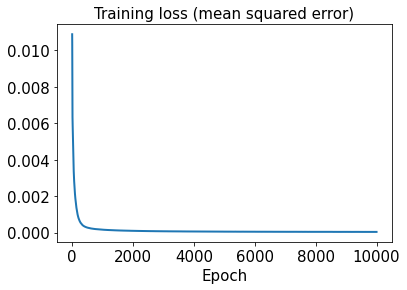

In [46]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

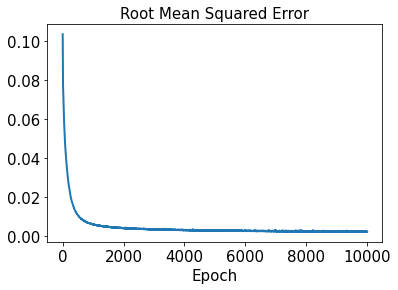

In [47]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
test_results = sd.evaluate(x_train)

15/15 [==============================] - 0s 1ms/step - loss: 3.4314e-05 - rmse: 0.0000e+00


In [49]:
decoded_train = sd.predict(decoded_sensor_train)

In [50]:
decoded_test = sd.predict(decoded_sensor_test)

In [51]:
error_train_abs = np.abs(decoded_train - y_train)

In [52]:
error_test_abs = np.abs(decoded_test - y_test)

In [53]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0027490957


In [54]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.061558597


In [55]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.0031316753, 0.0007552416, 0.002266239, 0.0031993603, 0.0013113023, 0.0029492544, 0.0018489254, 0.0013134921, 0.008303856, 0.0009797398, 0.0034696653, 0.0009064255, 0.0024682768, 0.00068305025, 0.0017450535, 0.0017720382, 0.0010073889, 0.003016284, 0.0010578325, 0.0049111117, 0.0020230273, 0.0016806013, 0.0038775043, 0.0021587198, 0.0027887595, 0.0029684093, 0.0044517703, 0.0020004925, 0.0028579563, 0.0016823211, 0.0016171336, 0.0006185466, 0.002238142, 0.0029864565, 0.0015158035, 0.003095089, 0.0036245214, 0.0022874428, 0.003930084, 0.004005356, 0.0016511645, 0.002136178, 0.0027992646, 0.0015030203, 0.001287071, 0.0010327449, 0.0019583823, 0.0019650501, 0.0039169383, 0.003257967, 0.0052219783, 0.0020888788, 0.0015901019, 0.0010368434, 0.0045002517, 0.0012773975, 0.0032577584, 0.0012727381, 0.0024065655, 0.0019233654, 0.0011620404, 0.002834978, 0.004389572, 0.0014900559, 0.0009954171, 0.005703936, 0.00301616, 0.0019234642, 0.0029174248, 0.0035713927, 0.0026733084, 0.0020857328, 0.000

In [56]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.056040738, 0.13042173, 0.015234326, 0.022206351, 0.0066183894, 0.010313707, 0.36589122, 0.023476979, 0.02109222, 0.13860935, 0.037261624, 0.063484095, 0.21460679, 0.020912226, 0.020953894, 0.013078758, 0.004011704, 0.020422414, 0.039284255, 0.00585718, 0.095682465, 0.010847935, 0.046862904, 0.007267706, 0.09861518, 0.008421775, 0.08317492, 0.014915975, 0.016105719, 0.013052926, 0.011739021, 0.03716833, 0.03368157, 0.014109764, 0.13298853, 0.08100433, 0.011445529, 0.05042132, 0.016327087, 0.0067844777, 0.14725426, 0.017248899, 0.0059098825, 0.00481039, 0.035657566, 0.014591326, 0.00579955, 0.03155334, 0.026521811, 0.027452882, 0.007006768, 0.00516171, 0.049060404, 0.068566, 0.14687136, 0.072471656, 0.021735998, 0.028488027, 0.02942832, 0.0050297608, 0.21819447, 0.023488358, 0.018937023, 0.23309846, 0.0077633336, 0.10859473, 0.034753837, 0.007492797, 0.01253437, 0.005268396, 0.007798423, 0.0064264596, 0.042289626, 0.045813143, 0.09367851, 0.009019044, 0.03544304, 0.00746592, 0.0200679

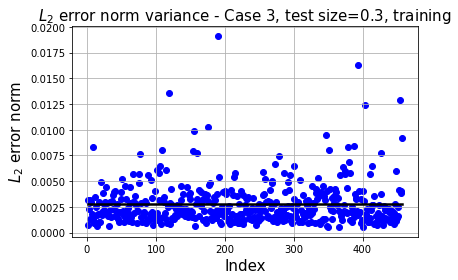

In [57]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 3, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

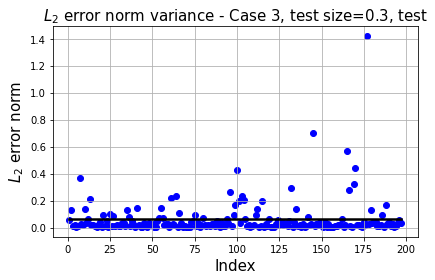

In [58]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 3, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

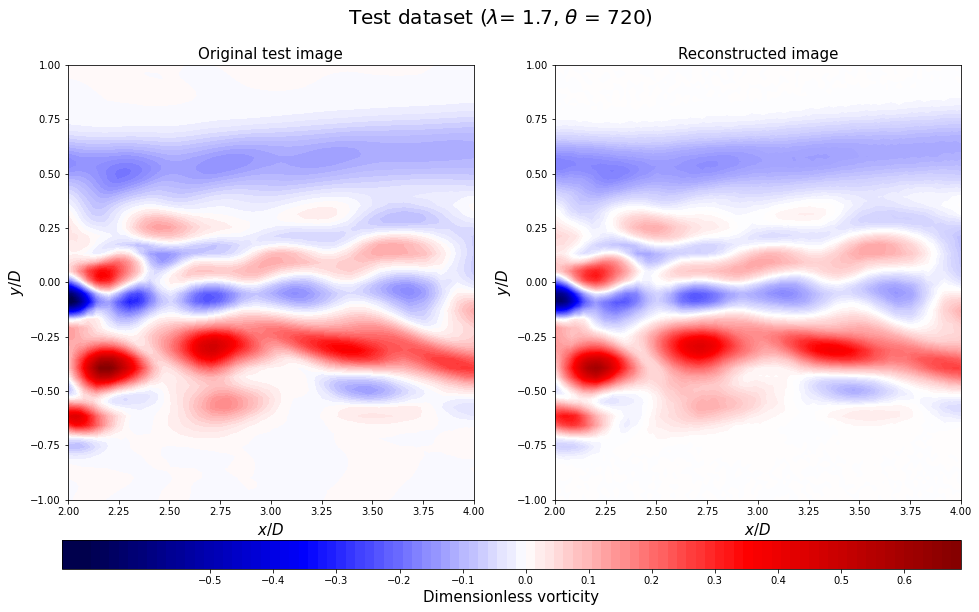

In [59]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

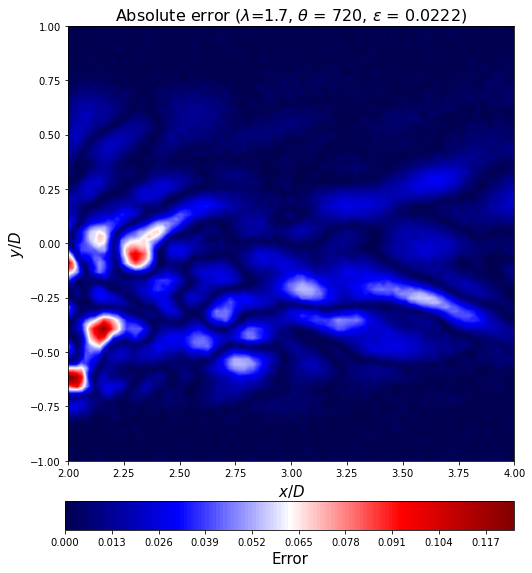

In [60]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()